In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, alignment_tools, domain_tools
print(os.getpid())

16956


# Initialize Cell_List class

In [2]:
reload(ia)
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.alignment_tools)
reload(ia.classes)
reload(ia.domain_tools)

<module 'ImageAnalysis3.domain_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\domain_tools\\__init__.py'>

In [3]:
# initialize cell-list parameter dict
param = {'data_folder':r'X:\20190627_IMR90_CTP05_DNA',
         'save_folder':r'\\dolly\Raw_data\puzheng\201907-DNA_unique',
         'experiment_type': 'DNA',
         'num_threads': 32,
         'correction_folder':r'D:\Corrections',
         'experiment_folder':r'X:\20190627_IMR90_CTP05_DNA\Experiment',
         };
# create cell_list object
lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])
# change some global settings
lst.shared_parameters['num_empty_frames'] = 0
lst.shared_parameters['corr_Z_shift'] = False

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 266
- Number of field of views: 70
- Importing csv file: X:\20190627_IMR90_CTP05_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: X:\20190627_IMR90_CTP05_DNA\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!
255 folders are found according to color-usage annotation.


In [8]:
failed_cells = pickle.load(open(r'X:\cells_to_rerun.pkl', 'rb'))
failed_cells = [(_a[0], _a[1]) for _a in failed_cells]

kept_cells = []
for _cell in lst.cells:
    if (_cell.fov_id, _cell.cell_id) in failed_cells:
        print(_cell.fov_id, _cell.cell_id)
        kept_cells.append(_cell)
lst.cells = kept_cells

In [12]:
fov_ids = np.unique([_a[0] for _a in failed_cells])

In [13]:
fov_ids

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

# Segmentation for all (only for the very first time)

## generate cell_segmentations and manually correct

In [ ]:
%matplotlib notebook
lst._pick_cell_segmentations(_min_shape_ratio=0.035, _shrink_percent=12, 
                             _save=True, _overwrite=False)

In [ ]:
# run this to save updated nucleus status
new_labels, remove_cts, append_cts = lst._update_cell_segmentations(_return_all=True, 
                                                                    _overwrite_segmentation=False, 
                                                                    _append_radius=110)

In [26]:
plt.close('all')

## another option: translate from old segmentation folder

In [ ]:
# generate rotation matrix
experiment_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment'
pos_file_before = os.path.join(experiment_folder, 'positions_10x_before.txt')    
pos_file_after = os.path.join(experiment_folder, 'positions_10x_after.txt')    
R,t = alignment_tools.align_manual_points(pos_file_before, pos_file_after)

In [ ]:
# required inputs
old_seg_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Analysis\segmentation'
old_dapi_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\H0R0'
old_correction_folder = r'I:\Corrections'
new_correction_folder = r'I:\Corrections'
# load previously generated rotation matrix 
experiment_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment'
rotation_mat = np.load(os.path.join(experiment_folder, 'rotation.npy'))
# translate segmentations!
new_seg_labels = lst._translate_old_segmentations(old_seg_folder, old_dapi_folder, rotation_mat,_force=True, 
                                                  _old_correction_folder=old_correction_folder,_return_all=True,
                                                  )

# Create cell objects

+ Create Cell_Data objects for field of view: [ 1  2  3  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
++ preparing variables
++ choose dapi images from folder: X:\20190627_IMR90_CTP05_DNA\H0R0.
+ Load segmentation for fov 1
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_01_segmentation.npy


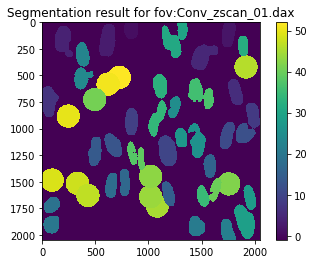

+ Create cell_data objects, num_of_cell:52
+ Load segmentation for fov 2
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_02_segmentation.npy


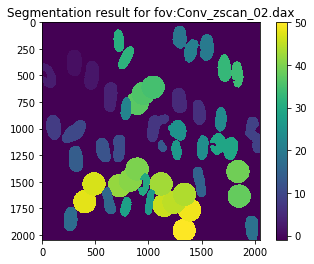

+ Create cell_data objects, num_of_cell:50
+ Load segmentation for fov 3
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_03_segmentation.npy


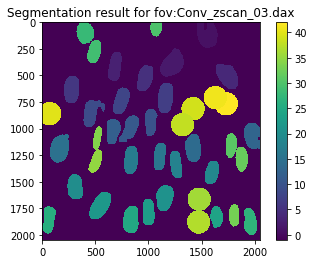

+ Create cell_data objects, num_of_cell:42
+ Load segmentation for fov 4
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_04_segmentation.npy


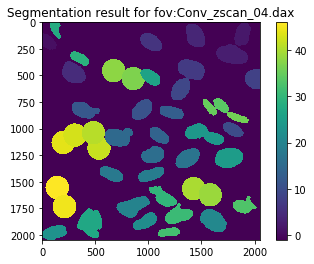

+ Create cell_data objects, num_of_cell:46
+ Load segmentation for fov 6
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_06_segmentation.npy


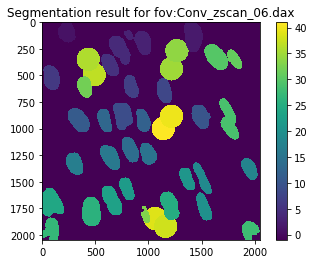

+ Create cell_data objects, num_of_cell:41
+ Load segmentation for fov 7
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_07_segmentation.npy


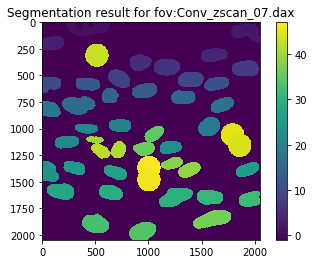

+ Create cell_data objects, num_of_cell:47
+ Load segmentation for fov 8
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_08_segmentation.npy


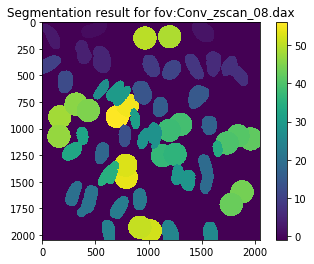

+ Create cell_data objects, num_of_cell:56
+ Load segmentation for fov 9
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_09_segmentation.npy


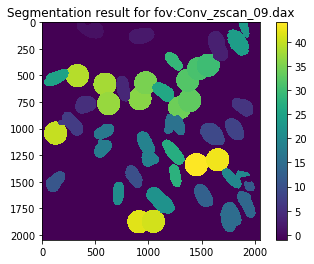

+ Create cell_data objects, num_of_cell:44
+ Load segmentation for fov 10
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_10_segmentation.npy


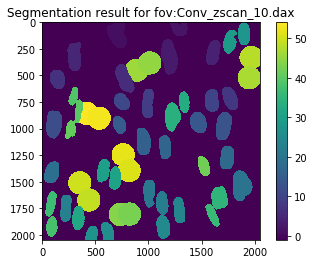

+ Create cell_data objects, num_of_cell:54
+ Load segmentation for fov 11
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_11_segmentation.npy


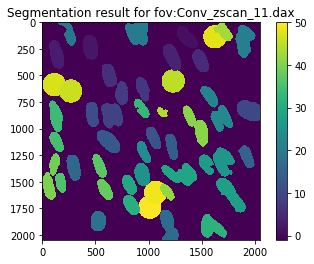

+ Create cell_data objects, num_of_cell:50
+ Load segmentation for fov 12
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_12_segmentation.npy


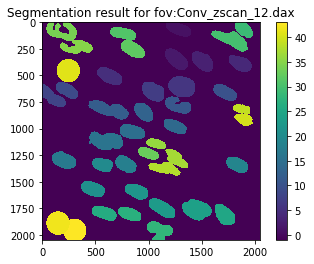

+ Create cell_data objects, num_of_cell:43
+ Load segmentation for fov 13
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_13_segmentation.npy


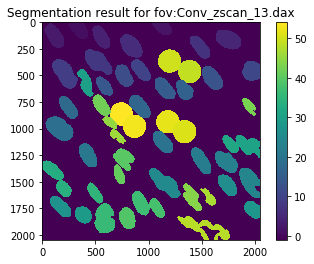

+ Create cell_data objects, num_of_cell:54
+ Load segmentation for fov 14
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_14_segmentation.npy


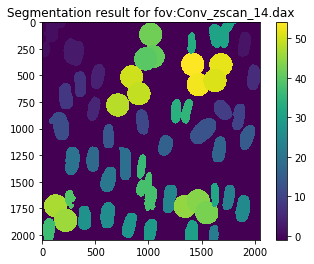

+ Create cell_data objects, num_of_cell:54
+ Load segmentation for fov 16
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_16_segmentation.npy


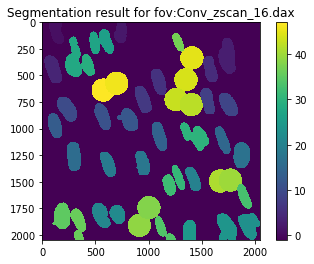

+ Create cell_data objects, num_of_cell:47
+ Load segmentation for fov 17
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_17_segmentation.npy


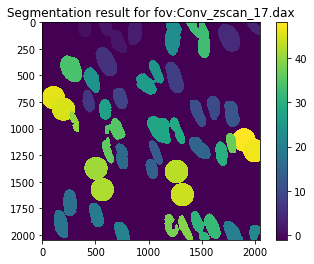

+ Create cell_data objects, num_of_cell:48
+ Load segmentation for fov 18
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_18_segmentation.npy


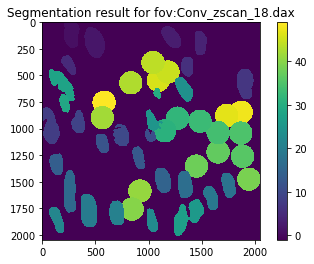

+ Create cell_data objects, num_of_cell:49
+ Load segmentation for fov 19
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_19_segmentation.npy


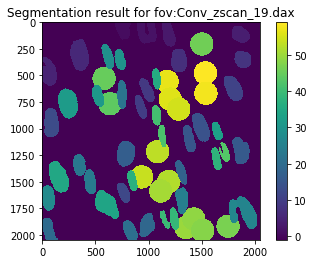

+ Create cell_data objects, num_of_cell:59
+ Load segmentation for fov 20
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_20_segmentation.npy


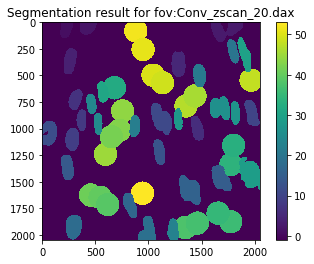

+ Create cell_data objects, num_of_cell:53
+ Load segmentation for fov 21
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_21_segmentation.npy


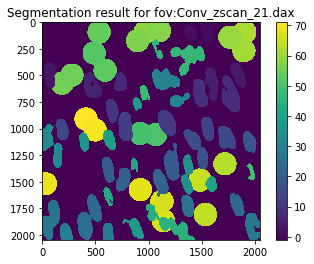

+ Create cell_data objects, num_of_cell:71
+ Load segmentation for fov 22
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_22_segmentation.npy


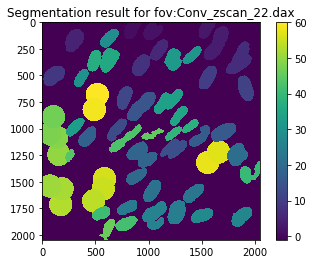

+ Create cell_data objects, num_of_cell:60
+ Load segmentation for fov 23
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_23_segmentation.npy


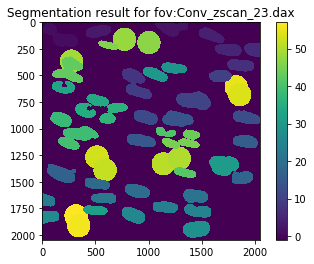

+ Create cell_data objects, num_of_cell:57
+ Load segmentation for fov 24
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_24_segmentation.npy


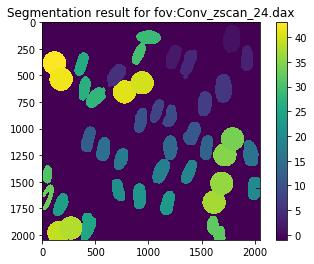

+ Create cell_data objects, num_of_cell:43
+ Load segmentation for fov 25
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_25_segmentation.npy


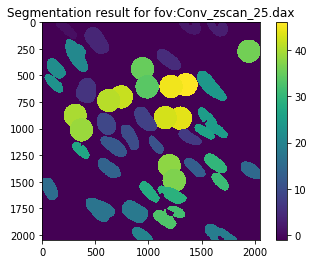

+ Create cell_data objects, num_of_cell:46
+ Load segmentation for fov 26
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_26_segmentation.npy


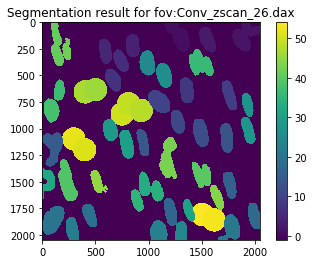

+ Create cell_data objects, num_of_cell:54
+ Load segmentation for fov 27
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_27_segmentation.npy


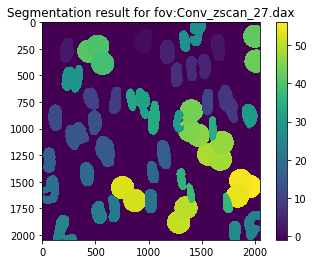

+ Create cell_data objects, num_of_cell:56
+ Load segmentation for fov 28
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_28_segmentation.npy


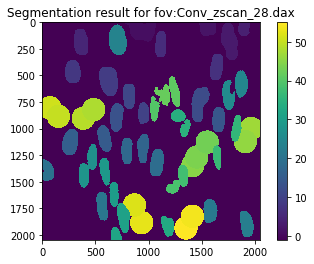

+ Create cell_data objects, num_of_cell:55
+ Load segmentation for fov 29
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_29_segmentation.npy


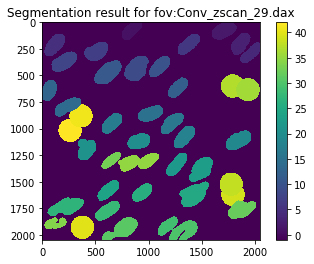

+ Create cell_data objects, num_of_cell:42
+ Load segmentation for fov 30
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_30_segmentation.npy


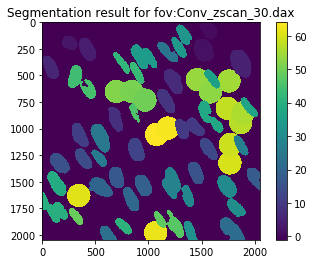

+ Create cell_data objects, num_of_cell:64
+ Load segmentation for fov 31
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_31_segmentation.npy


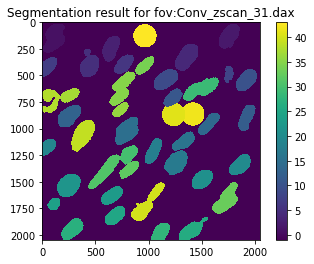

+ Create cell_data objects, num_of_cell:43
+ Load segmentation for fov 32
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_32_segmentation.npy


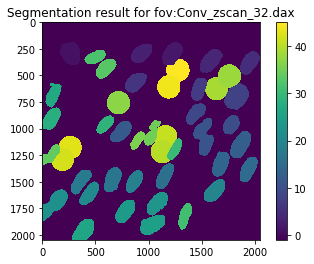

+ Create cell_data objects, num_of_cell:45
+ Load segmentation for fov 33
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_33_segmentation.npy


+ Create cell_data objects, num_of_cell:51
+ Load segmentation for fov 34
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_34_segmentation.npy


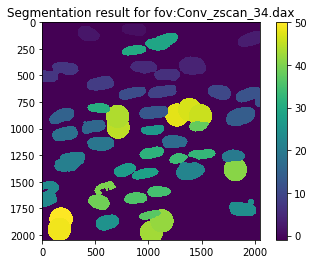

+ Create cell_data objects, num_of_cell:50
+ Load segmentation for fov 35
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_35_segmentation.npy


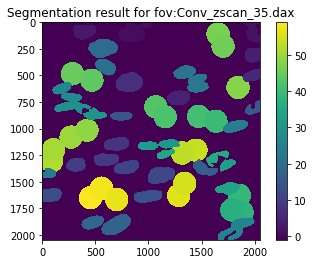

+ Create cell_data objects, num_of_cell:59
+ Load segmentation for fov 36
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_36_segmentation.npy


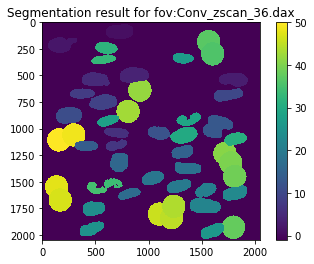

+ Create cell_data objects, num_of_cell:50
+ Load segmentation for fov 37
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_37_segmentation.npy


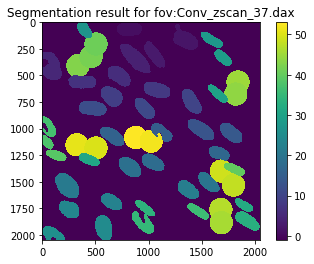

+ Create cell_data objects, num_of_cell:53
+ Load segmentation for fov 38
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_38_segmentation.npy


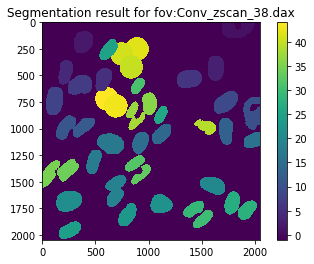

+ Create cell_data objects, num_of_cell:44
+ Load segmentation for fov 39
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_39_segmentation.npy


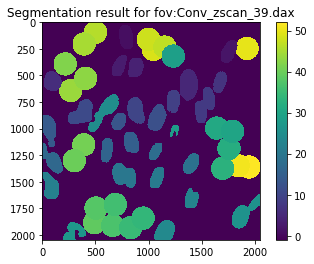

+ Create cell_data objects, num_of_cell:52
+ Load segmentation for fov 40
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_40_segmentation.npy


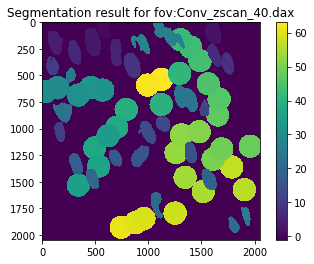

+ Create cell_data objects, num_of_cell:63
+ Load segmentation for fov 41
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_41_segmentation.npy


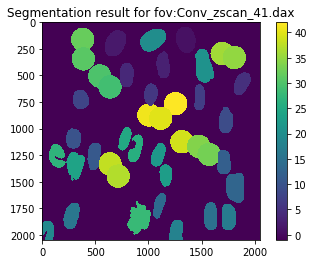

+ Create cell_data objects, num_of_cell:42
+ Load segmentation for fov 42
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_42_segmentation.npy


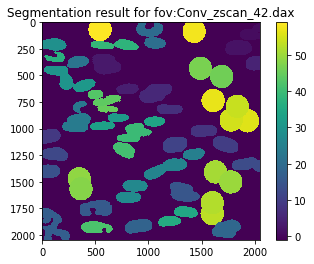

+ Create cell_data objects, num_of_cell:59
+ Load segmentation for fov 43
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_43_segmentation.npy


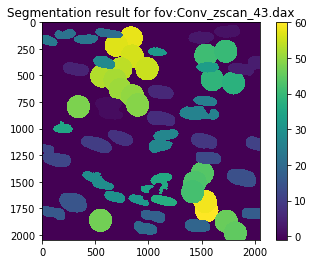

+ Create cell_data objects, num_of_cell:60
+ Load segmentation for fov 44
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_44_segmentation.npy


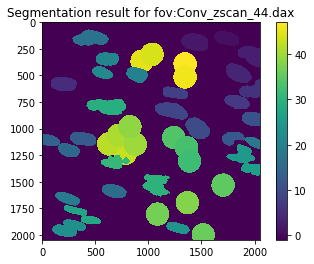

+ Create cell_data objects, num_of_cell:47
+ Load segmentation for fov 45
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_45_segmentation.npy


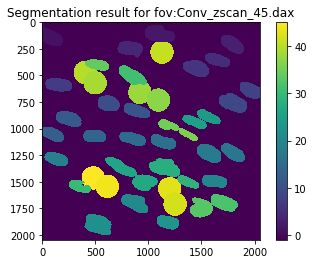

+ Create cell_data objects, num_of_cell:45
+ Load segmentation for fov 46
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_46_segmentation.npy


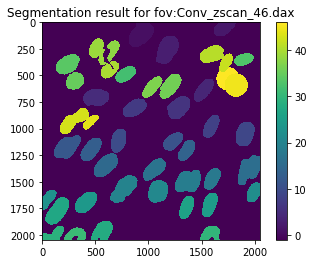

+ Create cell_data objects, num_of_cell:46
+ Load segmentation for fov 47
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_47_segmentation.npy


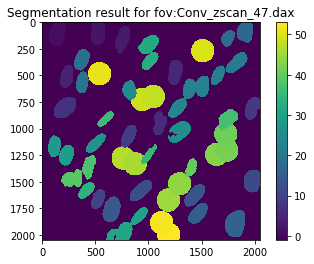

+ Create cell_data objects, num_of_cell:53
+ Load segmentation for fov 49
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_49_segmentation.npy


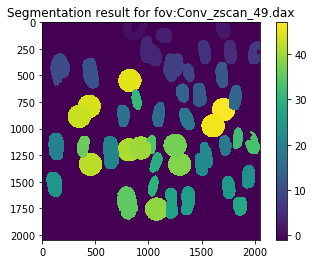

+ Create cell_data objects, num_of_cell:47
+ Load segmentation for fov 50
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_50_segmentation.npy


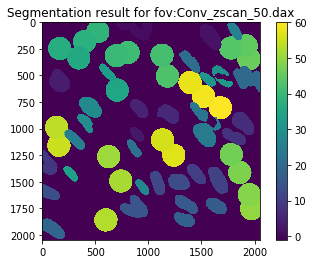

+ Create cell_data objects, num_of_cell:60
+ Load segmentation for fov 51
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_51_segmentation.npy


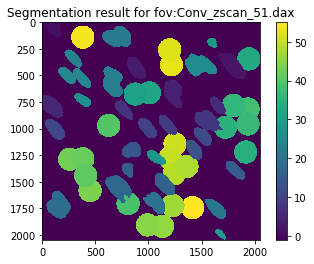

+ Create cell_data objects, num_of_cell:55
+ Load segmentation for fov 52
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_52_segmentation.npy


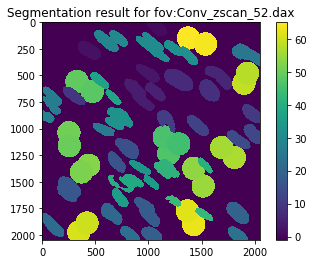

+ Create cell_data objects, num_of_cell:65
+ Load segmentation for fov 53
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_53_segmentation.npy


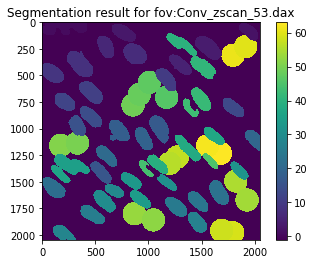

+ Create cell_data objects, num_of_cell:63
+ Load segmentation for fov 54
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_54_segmentation.npy


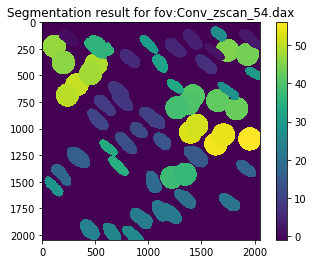

+ Create cell_data objects, num_of_cell:56
+ Load segmentation for fov 55
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_55_segmentation.npy


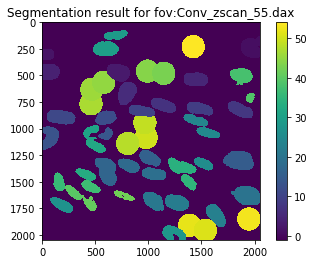

+ Create cell_data objects, num_of_cell:54
+ Load segmentation for fov 56
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_56_segmentation.npy


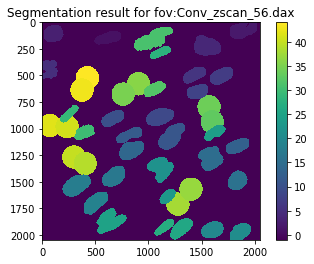

+ Create cell_data objects, num_of_cell:44
+ Load segmentation for fov 57
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_57_segmentation.npy


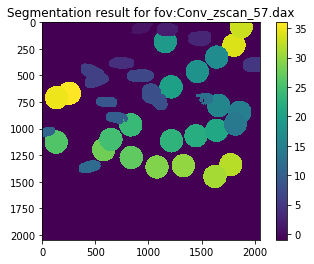

+ Create cell_data objects, num_of_cell:36
+ Load segmentation for fov 58
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_58_segmentation.npy


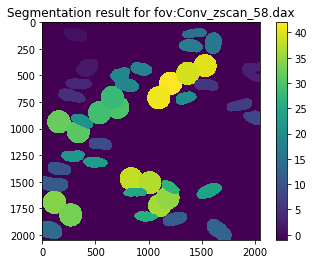

+ Create cell_data objects, num_of_cell:42
+ Load segmentation for fov 59
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_59_segmentation.npy


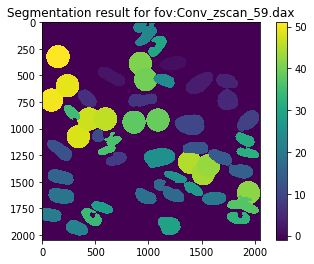

+ Create cell_data objects, num_of_cell:51
+ Load segmentation for fov 60
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_60_segmentation.npy


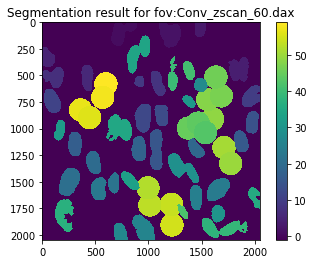

+ Create cell_data objects, num_of_cell:59
+ Load segmentation for fov 61
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_61_segmentation.npy


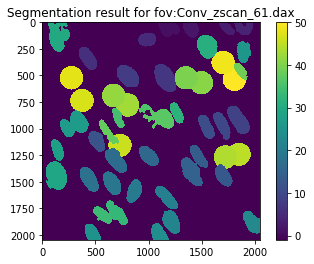

+ Create cell_data objects, num_of_cell:50
+ Load segmentation for fov 62
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_62_segmentation.npy


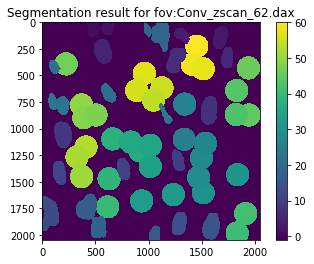

+ Create cell_data objects, num_of_cell:60
+ Load segmentation for fov 63
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_63_segmentation.npy


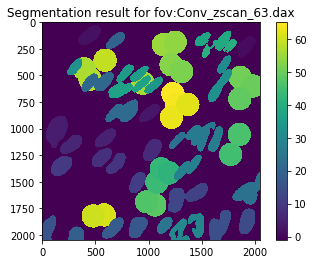

+ Create cell_data objects, num_of_cell:65
+ Load segmentation for fov 64
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_64_segmentation.npy


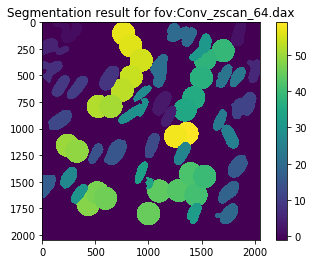

+ Create cell_data objects, num_of_cell:59
+ Load segmentation for fov 65
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_65_segmentation.npy


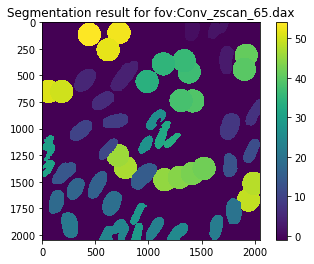

+ Create cell_data objects, num_of_cell:54
+ Load segmentation for fov 66
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_66_segmentation.npy


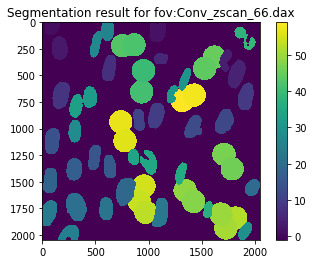

+ Create cell_data objects, num_of_cell:59
+ Load segmentation for fov 67
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_67_segmentation.npy


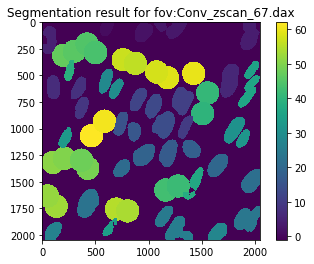

+ Create cell_data objects, num_of_cell:62
+ Load segmentation for fov 68
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_68_segmentation.npy


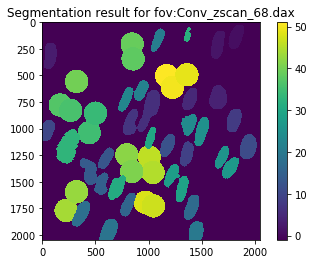

+ Create cell_data objects, num_of_cell:51
+ Load segmentation for fov 69
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_69_segmentation.npy


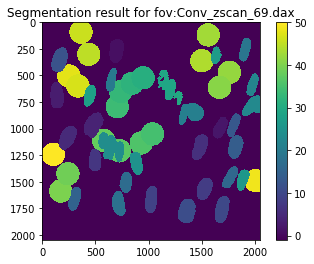

+ Create cell_data objects, num_of_cell:50
+ Creating 3441 cells with 32 threads.


In [14]:
%matplotlib inline

#fov_ids = np.concatenate([np.arange(1, 48), np.arange(49,70)])

#fov_ids = [5,11,14,16,17,20]

lst._create_cells_fov(fov_ids, _drift_size=500, _coord_sel=[1000,1000], _load_segmentation=False,
                      _load_exist_info=False, 
                      _exclude_attrs=['segmentation_label'])

In [15]:
failed_cells = pickle.load(open(r'X:\cells_to_rerun.pkl', 'rb'))
failed_cells = [(_a[0], _a[1]) for _a in failed_cells]

kept_cells = []
for _cell in lst.cells:
    if (_cell.fov_id, _cell.cell_id) in failed_cells:
        print(_cell.fov_id, _cell.cell_id)
        kept_cells.append(_cell)
lst.cells = kept_cells
print("Number of cells:", len(lst.cells))

1 25
1 27
1 28
1 48
2 6
2 41
3 0
3 10
3 20
3 34
4 29
4 32
4 39
6 4
6 8
6 25
6 26
6 28
6 34
7 0
7 23
8 28
8 35
8 39
8 49
9 2
9 14
9 15
10 12
10 15
10 34
11 19
11 20
11 22
11 25
11 27
11 33
11 43
12 2
12 28
12 29
12 34
12 37
13 29
13 32
14 30
16 8
16 13
16 27
16 35
17 1
17 5
17 22
17 34
17 38
18 8
18 15
19 25
19 48
20 2
20 10
20 12
20 14
20 35
20 39
20 48
21 0
21 10
21 18
21 44
21 46
21 56
21 58
21 62
21 66
21 69
22 13
22 14
22 31
22 33
22 38
22 42
22 49
23 0
23 1
23 5
23 22
23 42
23 47
24 26
24 38
25 37
25 44
26 38
26 43
26 50
27 11
27 19
27 28
27 49
27 50
27 54
28 19
28 40
28 54
29 1
29 22
29 27
29 31
29 34
30 21
30 42
30 46
30 47
30 50
30 52
31 0
31 6
31 11
31 14
31 28
31 39
32 13
32 38
33 0
33 1
33 10
33 23
33 28
33 29
33 34
33 35
33 39
33 47
34 6
34 12
34 19
34 27
34 28
34 30
34 31
34 36
34 46
35 8
35 10
35 11
35 16
35 17
35 20
35 21
35 25
35 27
35 29
35 35
35 36
35 40
35 42
35 43
35 52
35 53
36 12
36 35
36 41
36 44
36 49
37 3
37 4
37 5
37 8
37 27
37 47
37 48
38 9
38 15
38 16
38 20


# Crop unique images

In [ ]:
# crop from original images
lst._crop_image_for_cells('unique', _load_in_ram=False,
                          _overwrite_cell_info=True, _force=False, _save=True)

# Generate chromosomes

## automatically generate chromosomes and manually pick

In [7]:
%matplotlib notebook

+ Generate chromosomes for cells.
-- cell:28 in fov:5 doesnot have unique_ims, trying to load now.


E:\Users\puzheng\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:382: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


-- cell:28 in fov:11 doesnot have unique_ims, trying to load now.
-- cell:31 in fov:11 doesnot have unique_ims, trying to load now.
-- cell:40 in fov:11 doesnot have unique_ims, trying to load now.
-- cell:47 in fov:11 doesnot have unique_ims, trying to load now.
-- cell:37 in fov:14 doesnot have unique_ims, trying to load now.
-- cell:29 in fov:16 doesnot have unique_ims, trying to load now.
-- cell:32 in fov:17 doesnot have unique_ims, trying to load now.
-- cell:31 in fov:20 doesnot have unique_ims, trying to load now.
++ dumping existing info to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\chrom_coords_5-20.pkl
Maximum dimension for these images: [ 30 430 377]


<IPython.core.display.Javascript object>


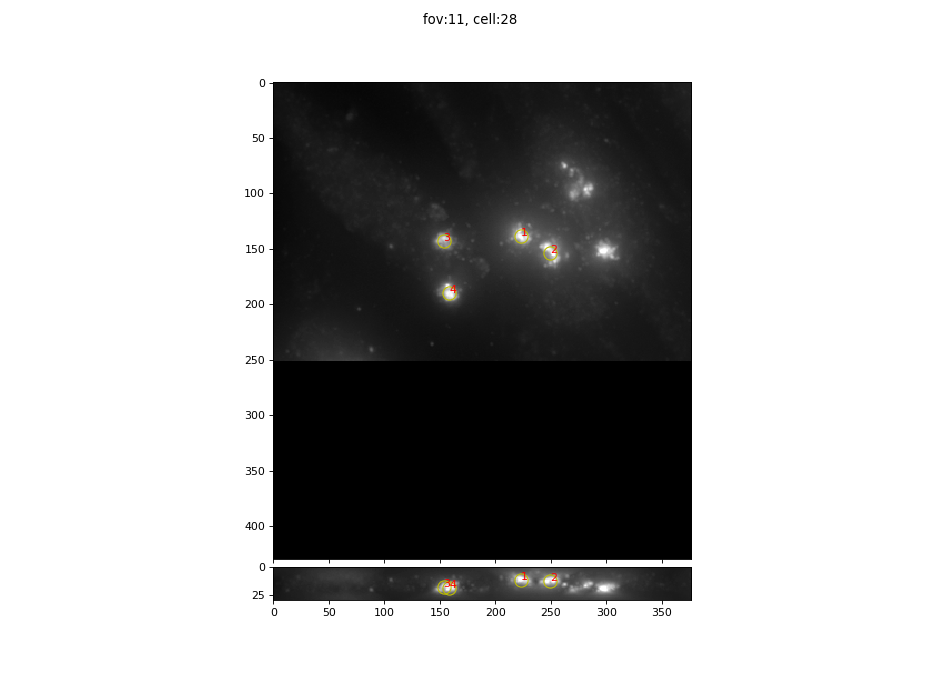

In [8]:
# pick
%matplotlib notebook
lst._get_chromosomes_for_cells('unique',_max_count=90, _overwrite=True)

## update manually picked chromosomes

In [9]:
# update
reload(visual_tools)
lst._update_chromosomes_for_cells()

+ Update manually picked chromosomes to cells
++ matching 4 chromosomes for fov:5, cell:28
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\cell_info.pkl
++ matching 4 chromosomes for fov:11, cell:28
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-28\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-28\cell_info.pkl
++ matching 4 chromosomes for fov:11, cell:31
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_u

# Get region coordinates

## multi-fitting spots

In [10]:
# multi-fitting
lst._spot_finding_for_cells('unique', _max_fitting_threads=32, _overwrite=True, _save=True)

- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 1

++ total time in fitting unique: 193.3427381515503
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-31\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-31\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots', 'unique_ids']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-31\cell_info.pkl
++ clear images for unique in fov:11, cell:31
- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-11\cell-40\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99

- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-14\cell-37\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 

++ total time in fitting unique: 190.45964765548706
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-17\cell-32\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-17\cell-32\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots', 'unique_ids']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-17\cell-32\cell_info.pkl
++ clear images for unique in fov:17, cell:32
- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-20\cell-31\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 9

In [11]:
# multi-fitting
lst._spot_finding_for_cells('gene', _max_fitting_threads=32, 
                            _max_seed_count=12, _min_seed_count=6,
                            _overwrite=True, _save=True)

- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:28 with 32 threads
++ total time in fitting gene: 34.23746681213379
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['gene_spots', 'gene_ids']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-5\cell-28\cell_info.pkl
++ clear im

++ clear images for gene in fov:17, cell:32
- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-20\cell-31\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:20, cell:31 with 32 threads
++ total time in fitting gene: 34.64250302314758
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-20\cell-31\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-20\cell-31\cell_info.pkl
-- information updated in cell_info.pkl: ['gene_spots', 'gene_ids']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DN

## pick spots by EM

In [16]:
lst._load_cells_from_files('cell_info', _load_attrs=['unique_spots', 'unique_ids', 'chrom_coords', 'EM_picked_unique_spots'])

+ Load cell_info for cells from existing files.
++ 394 of cell_info loading jobs planned.


In [15]:
lst._load_cells_from_files('distance_map')

+ Load distance_map for cells from existing files.
++ 9 of distance_map loading jobs planned.


In [12]:
for _cell in lst.cells:
    if _cell.unique_ids is None or len(_cell.unique_ids) < 651:
        _save_filename = os.path.join(_cell.save_folder, 'unique_rounds.npz')
        with np.load(_save_filename) as handle:
            _cell.unique_ids = list(handle['ids'])
        _cell._save_to_file('cell_info', _save_dic={'unique_ids':_cell.unique_ids})

In [ ]:
%matplotlib inline
# whether overwrite picked pts
_overwrite_picked_pts = True
lst._pick_spots_for_cells('unique', _pick_type='EM', _num_threads=20,
                          _intensity_th=0.8,
                          _local_size=5, _w_ctdist=3, _w_lcdist=1, _w_int=1, _w_nbdist=1,
                          _check_th=-3., _check_percentile=2.5,
                          _save_plot=True, _save_to_info=True, 
                          _overwrite=_overwrite_picked_pts)

+ Pick spots and convert to distmap, use_chrom_coords:True
++ start multi-processing picking spots by EM for 394 cells


In [17]:
for _cell in lst.cells:
    #if not hasattr(_cell, 'EM_unique_distance_map'):
    print(_cell.fov_id, _cell.cell_id, len(_cell.chrom_coords), len(_cell.EM_picked_unique_spots))

1 25 3 3
1 27 2 2
1 28 4 4
1 48 4 4
2 6 4 4
2 41 2 2
3 0 2 2
3 10 3 3
3 20 2 2
3 34 2 2
4 29 6 6
4 32 4 4
4 39 2 2
6 4 2 2
6 8 4 4
6 25 2 2
6 26 3 3
6 28 4 4
6 34 2 2
7 0 4 4
7 23 2 2
8 28 4 4
8 35 4 4
8 39 4 4
8 49 4 4
9 2 4 4
9 14 4 4
9 15 4 4
10 12 2 2
10 15 2 2
10 34 4 4
11 19 4 4
11 20 3 3
11 22 4 4
11 25 3 3
11 27 4 4
11 33 4 4
11 43 2 2
12 2 2 2
12 28 2 2
12 29 4 4
12 34 4 4
12 37 4 4
13 29 2 2
13 32 3 3
14 30 2 2
16 8 3 3
16 13 2 2
16 27 4 4
16 35 2 2
17 1 4 4
17 5 3 3
17 22 4 4
17 34 3 3
17 38 2 2
18 8 2 2
18 15 4 4
19 25 2 2
19 48 5 5
20 2 4 4
20 10 4 4
20 12 2 2
20 14 3 3
20 35 3 3
20 39 4 4
20 48 4 4
21 0 4 4
21 10 3 3
21 18 4 4
21 44 4 4
21 46 4 4
21 56 4 4
21 58 4 4
21 62 3 3
21 66 5 5
21 69 4 4
22 13 4 4
22 14 4 4
22 31 2 2
22 33 4 4
22 38 2 2
22 42 4 4
22 49 5 5
23 0 4 4
23 1 4 4
23 5 2 2
23 22 2 2
23 42 4 4
23 47 4 4
24 26 2 2
24 38 2 2
25 37 4 4
25 44 4 4
26 38 4 4
26 43 4 4
26 50 2 2
27 11 2 2
27 19 4 4
27 28 3 3
27 49 4 4
27 50 3 3
27 54 4 4
28 19 4 4
28 40 4 4
28 5

7651


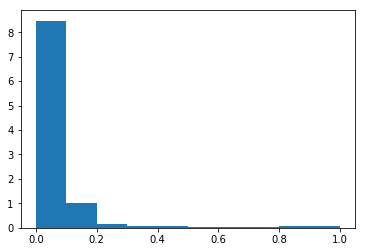

In [12]:
loss_prob = []
for _cell in lst.cells:
    if hasattr(_cell, 'EM_unique_distance_map'):
        distmaps = getattr(_cell, 'EM_unique_distance_map')
        for _distmap in distmaps:
            loss_prob.append(np.sum(np.isnan(_distmap).sum(0) == len(_distmap)-1)/len(_distmap))
print(len(loss_prob))
plt.figure()
plt.hist(loss_prob,10, range=(0,1),density=True)
plt.show()

# Generate population distance maps

In [5]:
# batch load distance map, make it faster
lst._load_cells_from_files('distance_map', _distmap_data='unique', _distmap_pick='EM')

+ Load distance_map for cells from existing files.
++ 3526 of distance_map loading jobs planned.


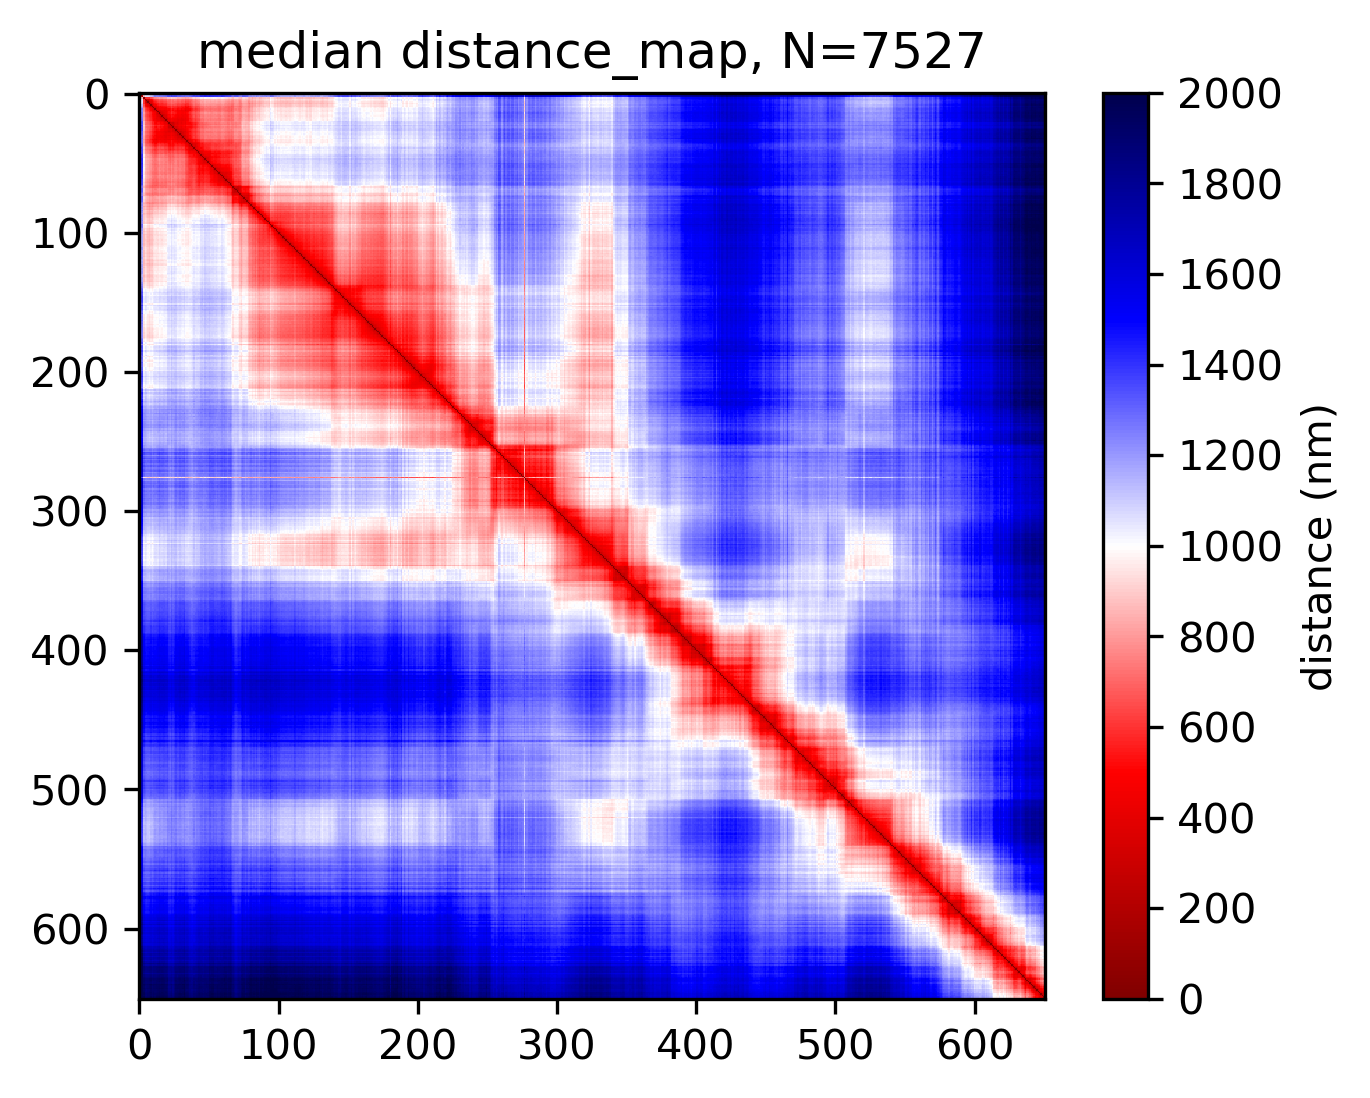

In [7]:
# median distance map
%matplotlib inline
gaussian_filter_size = 0
average_map, all_maps, failure_rate = lst._calculate_population_map('unique', 'EM', _max_loss_prob=0.25,
                                                                    _stat_type='median',_gfilt_size=gaussian_filter_size,
                                                                    _plot_limits=[0,2000], 
                                                                    _return_all_maps=True, _verbose=False)

E:\Users\puzheng\Documents\ImageAnalysis3\classes.py:1531: RuntimeWarning: invalid value encountered in less
  _averaged_map = np.nansum(_total_map < _contact_th, axis=0) / \
E:\Users\puzheng\Documents\ImageAnalysis3\classes.py:1532: RuntimeWarning: invalid value encountered in less
  (np.nansum(_total_map < _contact_th, axis=0)+np.nansum(_total_map > _contact_th, axis=0))
E:\Users\puzheng\Documents\ImageAnalysis3\classes.py:1532: RuntimeWarning: invalid value encountered in greater
  (np.nansum(_total_map < _contact_th, axis=0)+np.nansum(_total_map > _contact_th, axis=0))


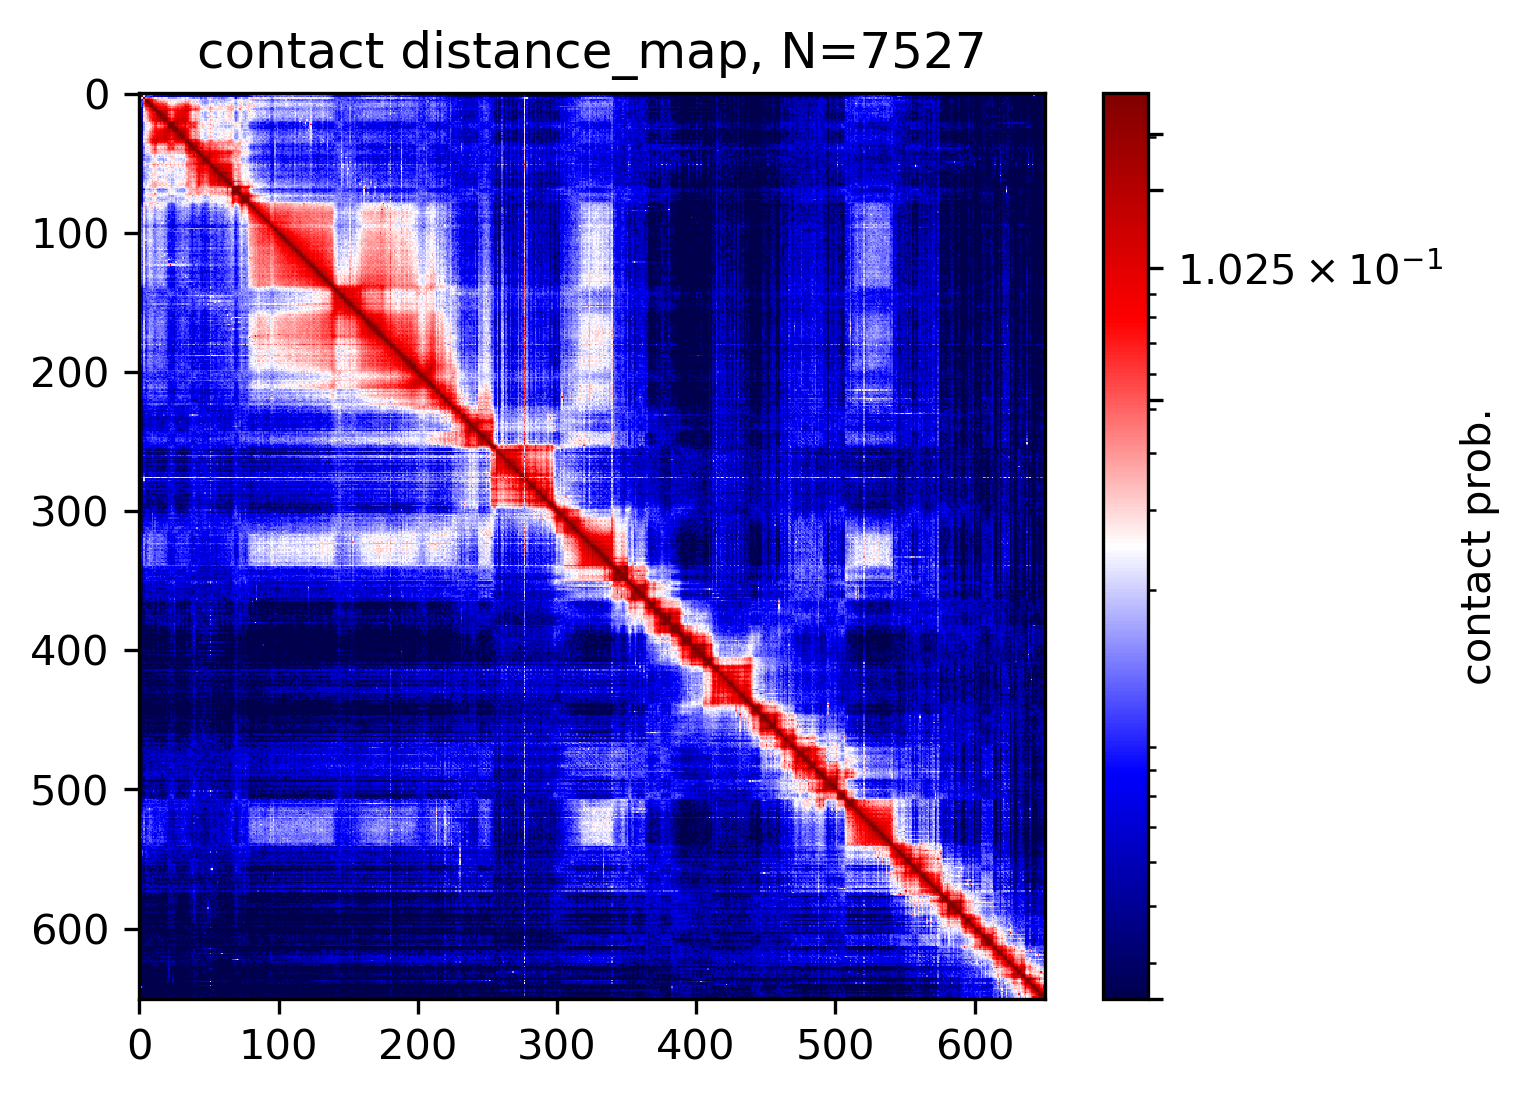

In [8]:
# contact probability map
contact_map, _ = lst._calculate_population_map('unique', 'EM', _max_loss_prob=0.25,
                                               _stat_type='contact', _gfilt_size=gaussian_filter_size,
                                               _plot_limits=[0.0025,0.25], _verbose=False)

# All the followings are not debugged yet.

In [9]:
# save picked_spots
fov_ids, cell_ids, chrom_ids, dna_spots = [], [], [], []
for _cell in lst.cells:
    if hasattr(_cell, 'EM_picked_unique_spots'):
        _sel_spots = getattr(_cell, 'EM_picked_unique_spots')
        for _chrom_id, _spots in enumerate(_sel_spots):
            fov_ids.append(_cell.fov_id)
            cell_ids.append(_cell.cell_id)
            chrom_ids.append(_chrom_id)
            dna_spots.append(_spots)
print(len(fov_ids))
save_dic = {'fov_ids':fov_ids,
            'cell_ids': cell_ids,
            'chrom_ids': chrom_ids,
            'dna_spots': dna_spots}
pickle.dump(save_dic, open(os.path.join(lst.save_folder, 'dna_spot_info_1-69.pkl'), 'wb'))

7691


# Correlations to Hi-C

## load Hi-C

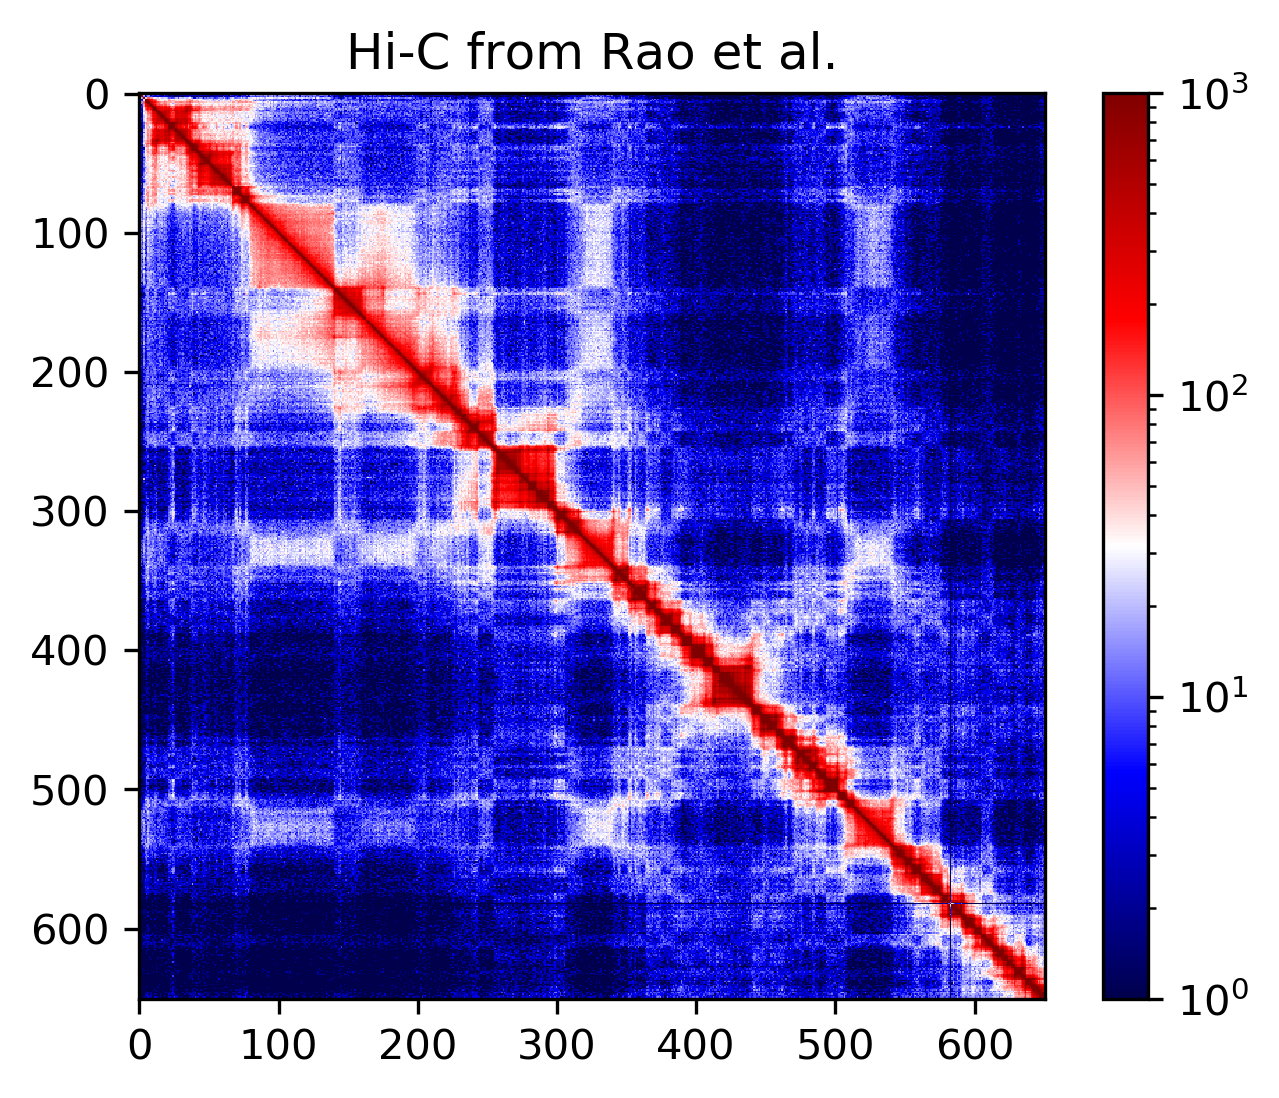

In [31]:
# save_folder
save_folder = lst.map_folder
# load hic
#with np.load(r'Z:\References\5x10_distmap.npz') as handle:
#    hic_map = handle['distance_map']
# plot hic
import matplotlib
plt.figure(figsize=(5,4), dpi=300)
plt.title('Hi-C from Rao et al.')
plt.imshow(hic_map+0.01, cmap='seismic', vmin=1, vmax=1000, interpolation='nearest', 
          norm=matplotlib.colors.LogNorm(vmin=hic_map.min(), vmax=hic_map.max()))
plt.colorbar()
#plt.savefig(os.path.join(save_folder, 'hic_seismic.png'), transparent=True)
plt.show()

## Hi-C vs. distance

In [40]:
region_success = failure_rate < 0.5

In [41]:
# r-square for distance
from scipy.stats import linregress, pearsonr
import matplotlib
k_sparse= np.triu(average_map[region_success][:,region_success], 1);
k_hic = np.triu(hic_map[region_success][:,region_success], 1);

kept = (k_sparse > 0) * (k_hic > 0) 
k_sparse = k_sparse[kept]
k_hic = k_hic[kept]

lr = linregress(np.log(k_sparse),-np.log(k_hic))
#lr = linregress(k_sparse,1/k_hic)
print(lr)
print('pearson correlation:', lr.rvalue)
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

LinregressResult(slope=5.2520991111871504, intercept=-39.371107567946957, rvalue=0.84705892319982634, pvalue=0.0, stderr=0.0075929020927472902)
pearson correlation: 0.920358040764


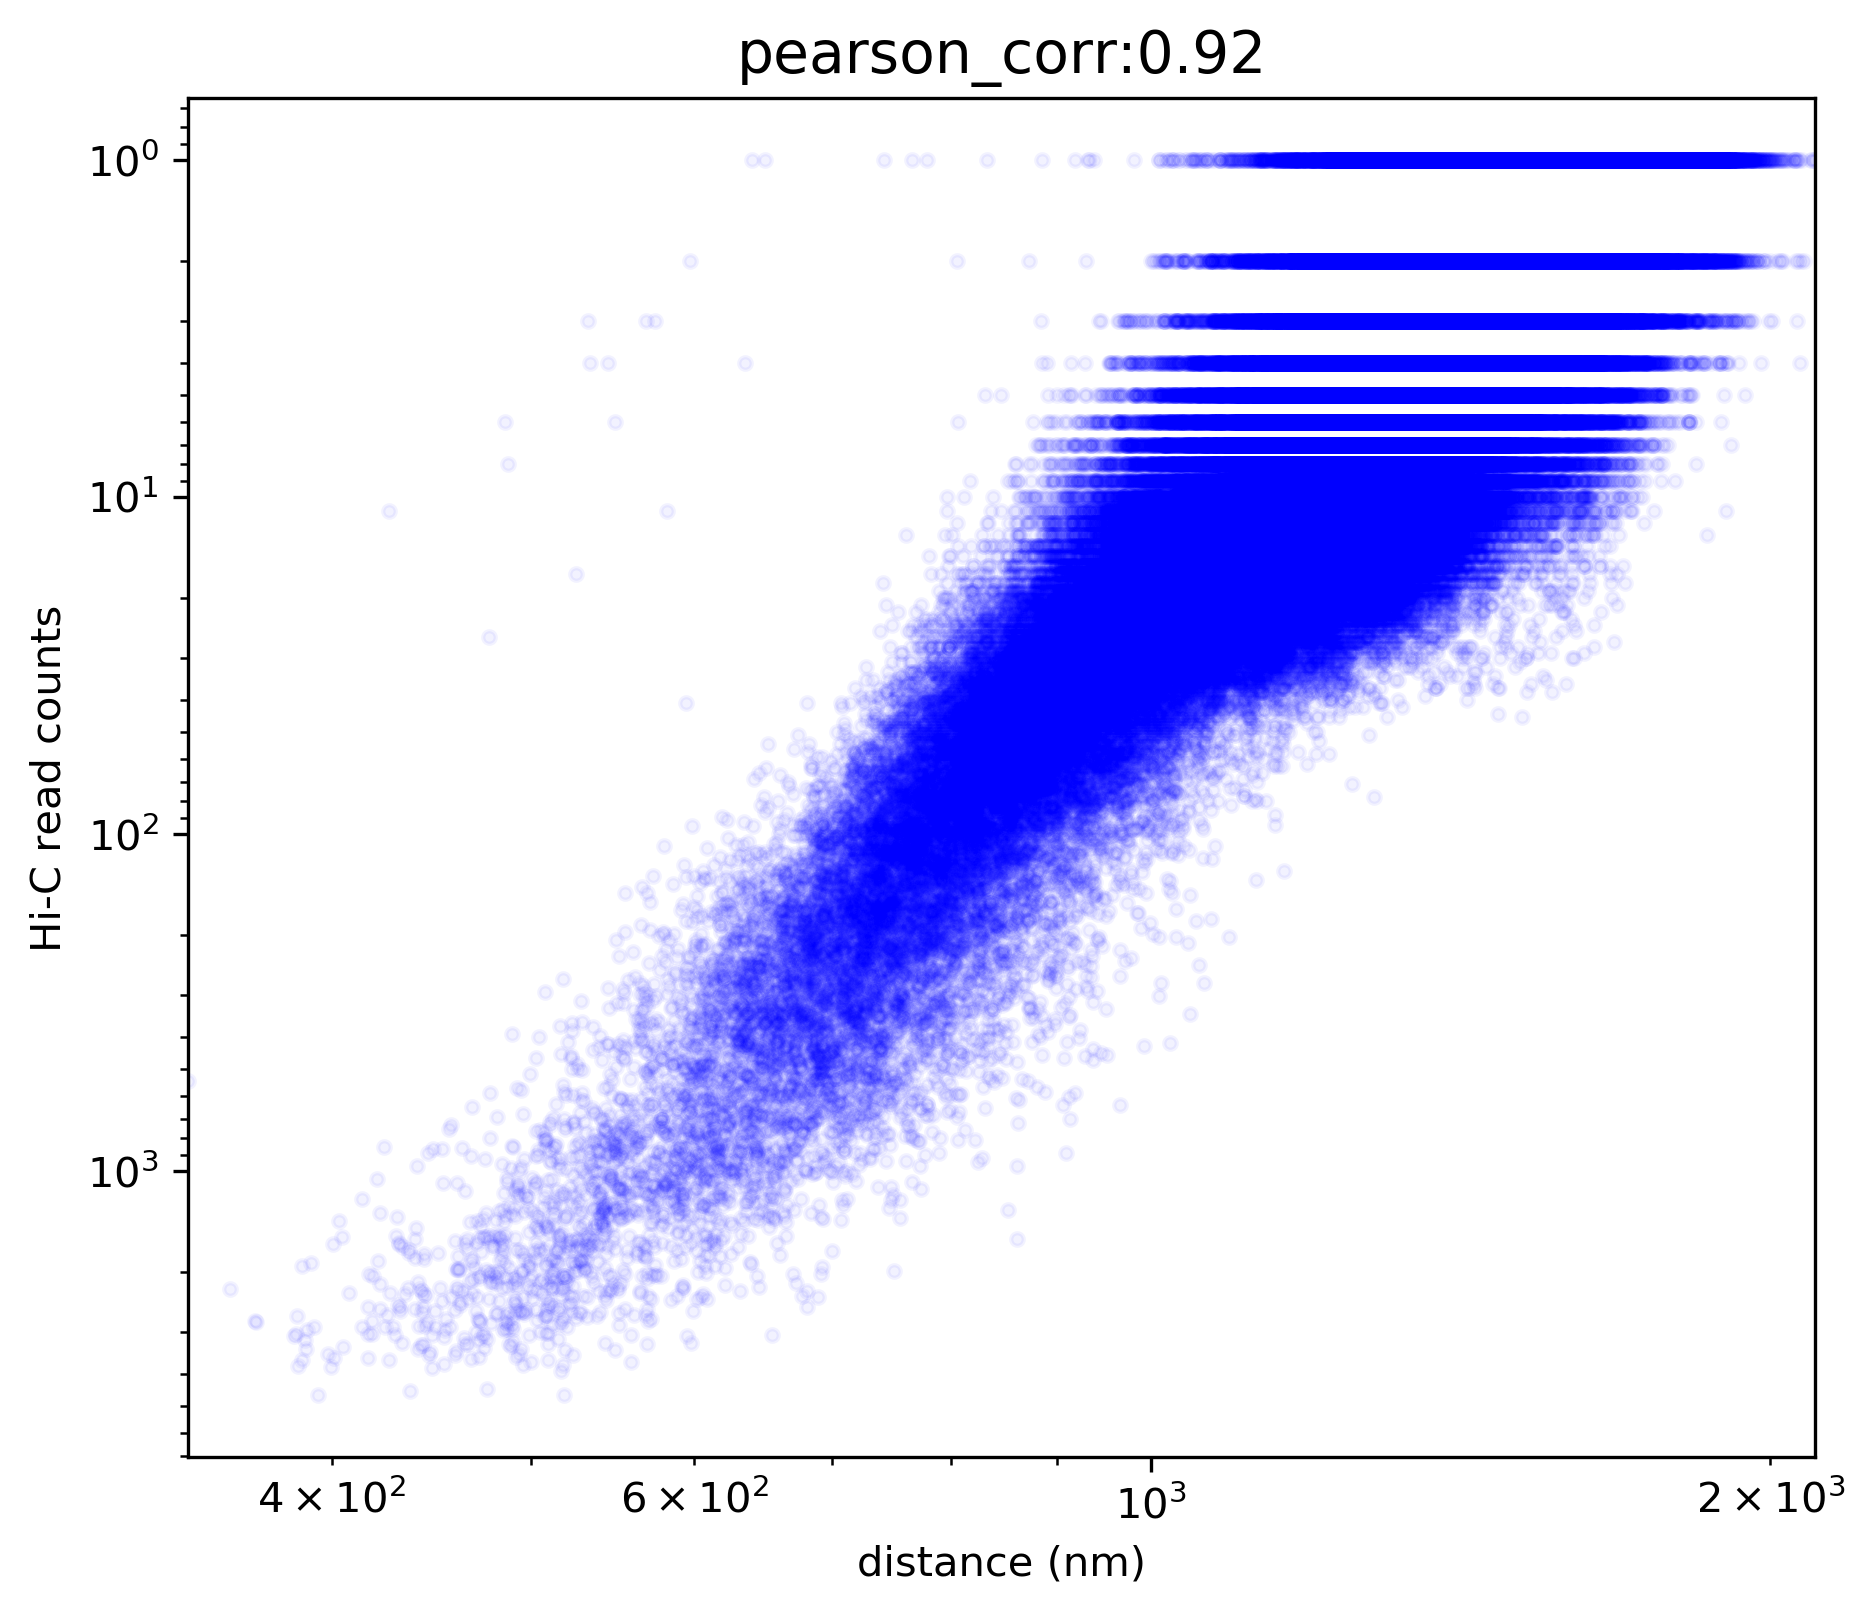

In [42]:
plt.figure(figsize=(7,6), dpi=300)
plt.plot(k_sparse, k_hic,'b.', alpha=0.05)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('distance (nm)')
plt.gca().invert_yaxis()
plt.xlim([np.min(k_sparse), np.max(k_sparse)])
plt.title(f"pearson_corr:{np.around(lr.rvalue,3)}", fontsize=14)
plt.show()

## Hi-C vs. contact

In [43]:
# r-square

k_contact = np.ravel(np.triu(contact_map[region_success][:,region_success],1))
k_hic = np.ravel(np.triu(hic_map[region_success][:,region_success], 1))

kept = (k_contact > 0) * (k_hic > 0) 
k_contact = k_contact[kept]
k_hic = k_hic[kept]

#lr = linregress(np.log(k_sparse),np.log(k_hic))
lr = linregress(k_contact,k_hic)

print(lr)
print('pearson correlation:', lr.rvalue)
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

LinregressResult(slope=7830.421886521659, intercept=-73.83503014895436, rvalue=0.69880641998032811, pvalue=0.0, stderr=18.468181126942671)
pearson correlation: 0.835946421716


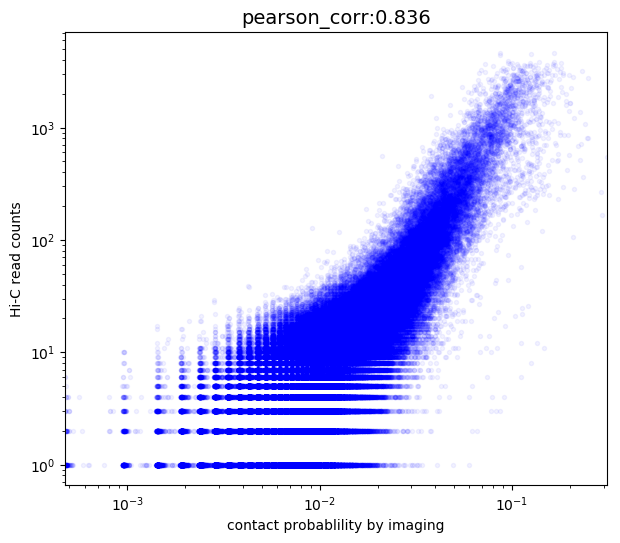

In [44]:
plt.figure(figsize=(7,6), dpi=100)
plt.plot(k_contact,k_hic,'b.', alpha=0.05)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('contact probablility by imaging')
plt.xlim([np.min(k_contact), np.max(k_contact)])


plt.title(f"pearson_corr:{np.around(lr.rvalue,3)}", fontsize=14)
plt.show()

# Genmoic Scaling

In [8]:
genomic_positions = get_img_info.Load_Region_Positions(lst.analysis_folder)
mid_positions = np.array([genomic_positions[_uid]['midpoint'] for _uid in lst.cells[0].unique_ids])

from scipy.spatial.distance import pdist, squareform
genomic_distance_map = squareform(pdist(mid_positions[:,np.newaxis]))

- Importing csv file: Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!


In [22]:
normalization_mat = np.exp(np.log(genomic_distance_map) * lr.slope + lr.intercept)
for _i in range(len(normalization_mat)):
    normalization_mat[_i,_i] = 0
# save
np.save(os.path.join(lst.analysis_folder, 'normalization_matrix'), normalization_mat)

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


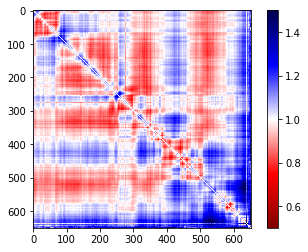

In [19]:
plt.figure()
plt.imshow(average_map / normalization_mat, cmap='seismic_r', vmin=0.5, vmax=1.5)
plt.colorbar()
plt.show()

In [11]:
genomic_distance_vector = np.ravel(np.triu(genomic_distance_map, 1))
median_distance_vector = np.ravel(np.triu(average_map, 1))

kept = (genomic_distance_vector > 0) * (median_distance_vector > 0)

lr = scipy.stats.linregress(np.log(genomic_distance_vector[kept]), np.log(median_distance_vector[kept]))
#lr = linregress(k_sparse,1/k_hic)
print(lr)
print('pearson correlation:', lr.rvalue)


LinregressResult(slope=0.17939011607276231, intercept=4.2891270830260257, rvalue=0.8761560276561986, pvalue=0.0, stderr=0.00021456498422126331)
pearson correlation: 0.936032065506


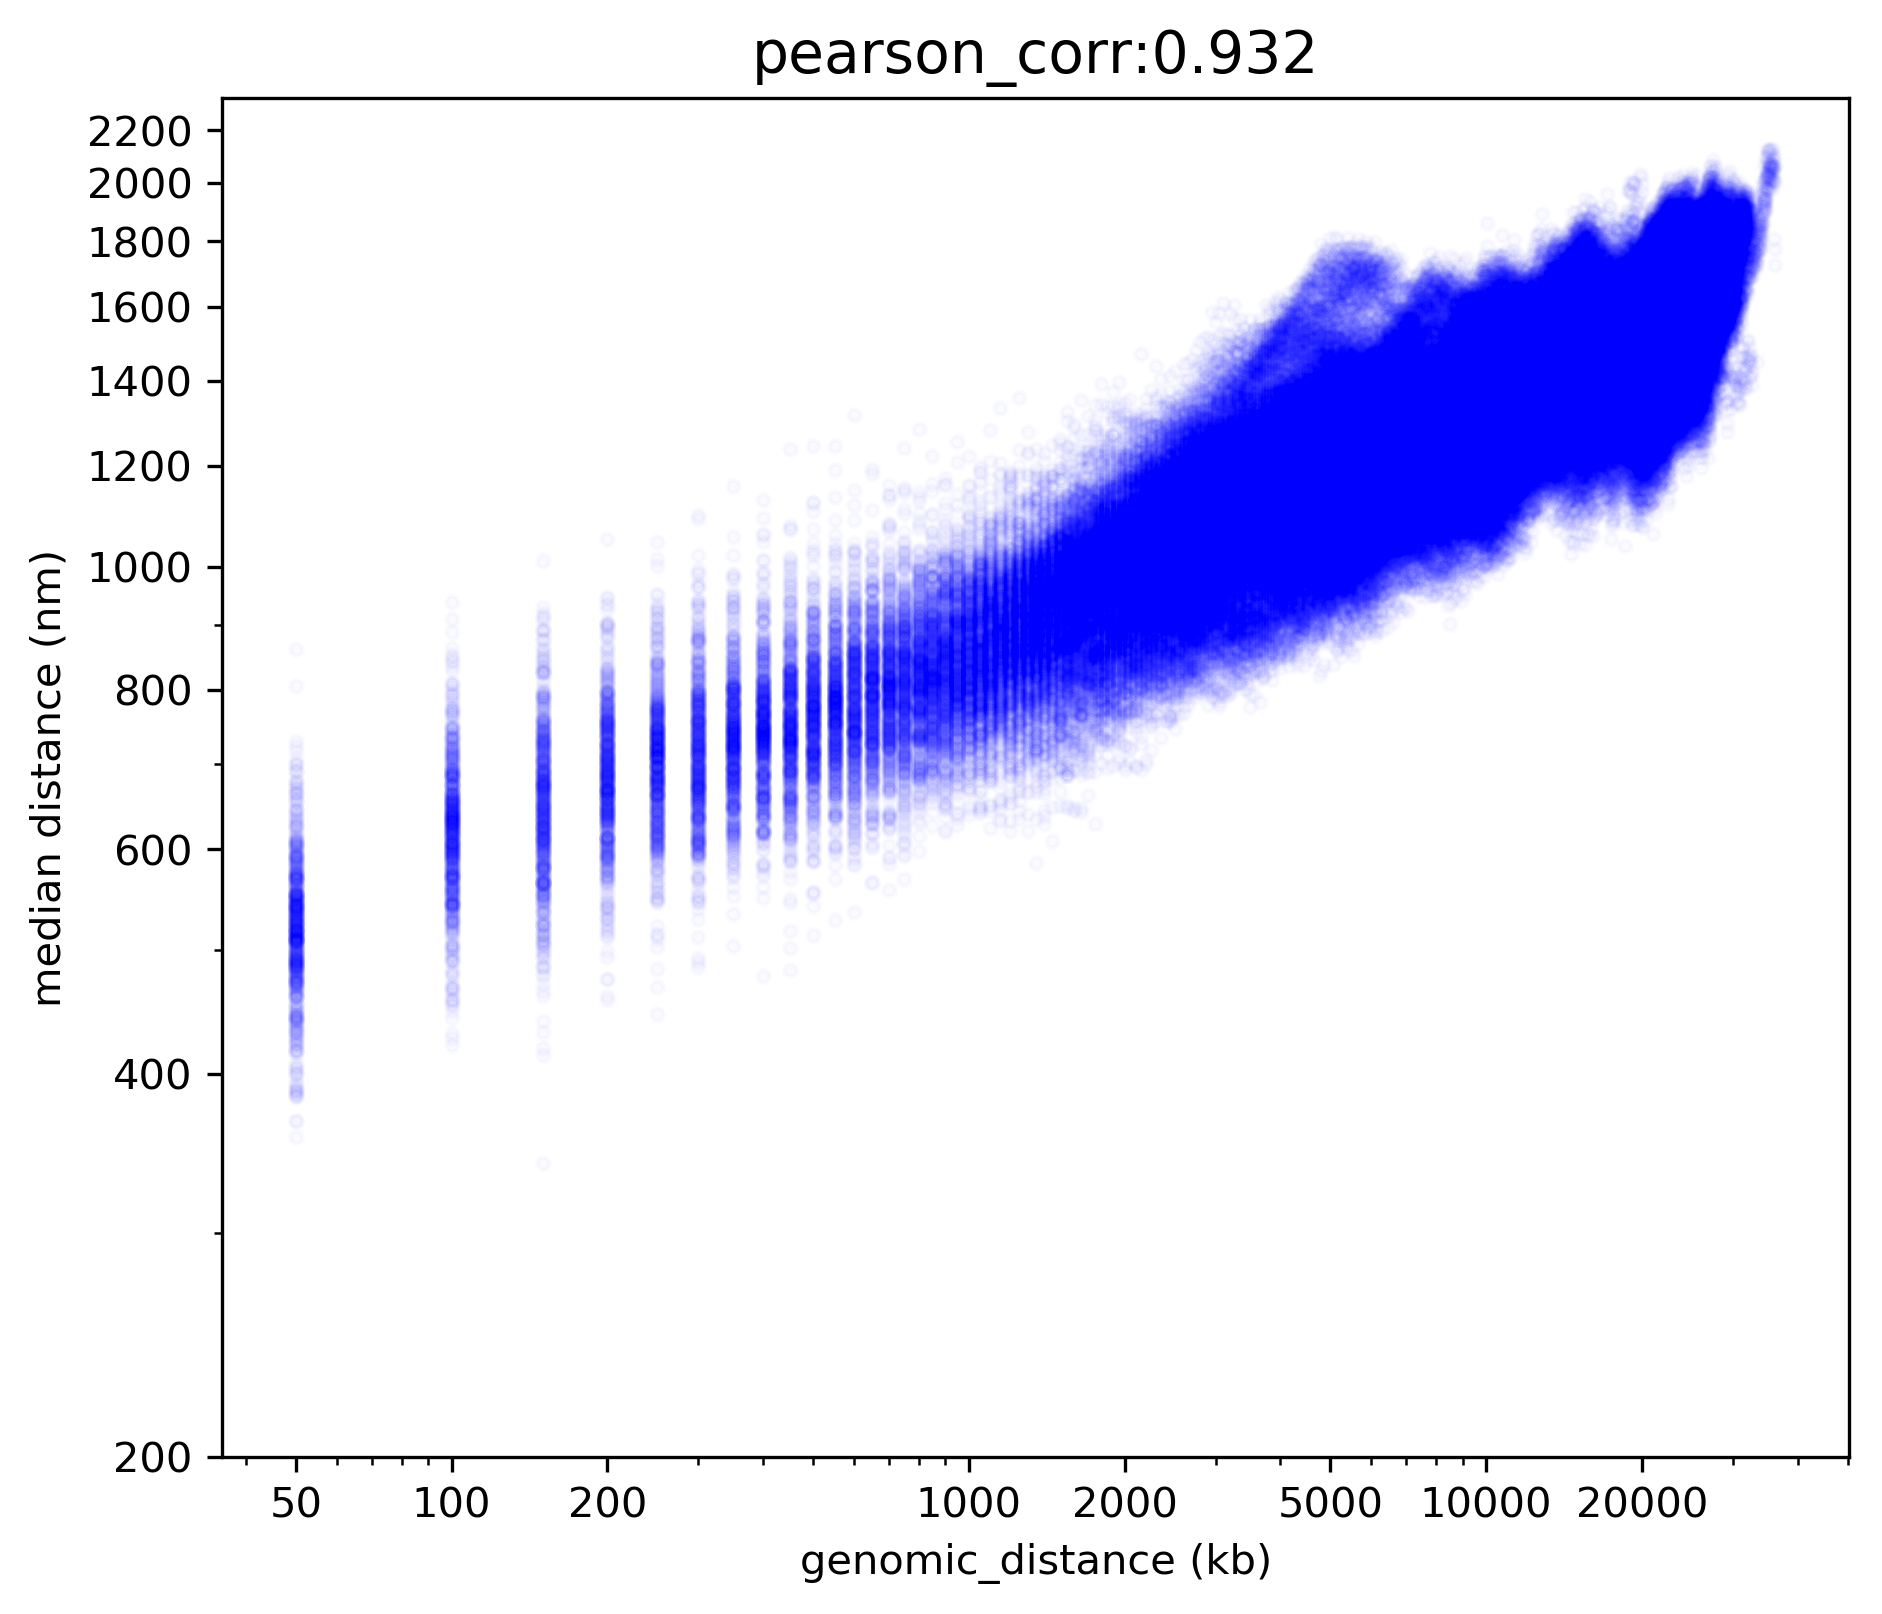

In [47]:
plt.figure(figsize=(7,6), dpi=300)
plt.plot(genomic_distance_vector/1e3, median_distance_vector, 'b.', alpha=0.02)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')

plt.xticks([50,100,200,1000,2000,5000,10000,20000], [50,100,200,1000,2000,5000,10000,20000])
plt.xlabel('genomic_distance (kb)')
plt.yticks(np.arange(200, 2400, 200), np.arange(200, 2400, 200))
plt.ylabel('median distance (nm)')

#plt.gca().invert_yaxis()
#plt.xlim([np.min(k_sparse), np.max(k_sparse)])
plt.title(f"pearson_corr:{np.around(lr.rvalue,3)}", fontsize=14)
plt.show()

# Call domains

In [ ]:
for _cell in lst.cells:
    _cell._call_sub_compartments('unique', 'EM', _save_result_fig=True)

-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly load sub-compartment_starts, skip!
-- directly l

E:\Users\puzheng\Documents\ImageAnalysis3\External\DomainTools.py:258: RuntimeWarning: invalid value encountered in true_divide
  Z=VV/WW
E:\Users\puzheng\Documents\ImageAnalysis3\domain_tools.py:318: RuntimeWarning: Mean of empty slice
  cm2 = np.nanmean(_zxy[i:i+dom_sz], axis=0)
E:\Users\puzheng\Documents\ImageAnalysis3\domain_tools.py:317: RuntimeWarning: Mean of empty slice
  cm1 = np.nanmean(_zxy[max(i-dom_sz, 0):i], axis=0)
E:\Users\puzheng\Documents\ImageAnalysis3\External\DomainTools.py:75: RuntimeWarning: All-NaN axis encountered
  if ratio[id_]==np.nanmax(ratio[l:r]) and ratio[id_]>cutoff_max:


---* merge domain: 5, start with region:79
---* merge domain: 29, start with region:344
---* merge domain: 29, start with region:357
---* merge domain: 29, start with region:364
---* merge domain: 7, start with region:112
---* merge domain: 6, start with region:105
---* merge domain: 25, start with region:330
---* merge domain: 25, start with region:336
---* merge domain: 11, start with region:171
---* merge domain: 4, start with region:67
---* merge domain: 7, start with region:151
---* merge domain: 27, start with region:428
---* merge domain: 26, start with region:420
---* merge domain: 17, start with region:271
---* merge domain: 19, start with region:304
---* merge domain: 5, start with region:122
---* merge domain: 24, start with region:447
---* merge domain: 28, start with region:511
---* merge domain: 31, start with region:565
---* merge domain: 7, start with region:164
---* merge domain: 6, start with region:159
---* merge domain: 8, start with region:195
---* merge domain: 9,

---* merge domain: 45, start with region:625
---* merge domain: 17, start with region:252
---* merge domain: 4, start with region:40
---* merge domain: 26, start with region:416
---* merge domain: 20, start with region:311
---* merge domain: 19, start with region:305
---* merge domain: 19, start with region:318
---* merge domain: 4, start with region:50
---* merge domain: 2, start with region:12
---* merge domain: 4, start with region:71
---* merge domain: 10, start with region:192
---* merge domain: 9, start with region:178
---* merge domain: 27, start with region:524
---* merge domain: 2, start with region:18
---* merge domain: 2, start with region:65
---* merge domain: 27, start with region:568
---* merge domain: 27, start with region:574
---* merge domain: 26, start with region:552
---* merge domain: 16, start with region:428
---* merge domain: 16, start with region:435
---* merge domain: 24, start with region:590
---* merge domain: 9, start with region:268
---* merge domain: 12, s

--- total time spent in sub-compartment calling: 8.006964445114136
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:51
---* merge domain: 13, start with region:178
---* merge domain: 47, start with region:622
---* merge domain: 46, start with region:614
---* merge domain: 37, start with region:497
---* merge domain: 29, start with region:382
---* merge domain: 31, start with region:421
---* merge domain: 2, start with region:20
---* merge domain: 5, start with region:95
---* merge domain: 2, start with region:35
---* merge domain: 41, start with region:645
---* merge domain: 27, start with region:411
---* merge domain: 27, start with region:431
---* merge domain: 10, start with region:196
---* merge domain: 19, start with region:306
---* merge domain: 4, start with region:118
---* merge domain: 9, start with region:203
---* merge domain: 9, start with region:209
---

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


--- total time spent in sub-compartment calling: 10.728991985321045
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-3\cell-8\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-3\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-3\cell-8\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:58
---* merge domain: 38, start with region:411
---* merge domain: 5, start with region:45
---* merge domain: 37, start with region:419
---* merge domain: 10, start with region:112
---* merge domain: 45, start with region:559
---* merge domain: 23, start with region:261
---* merge domain: 5, start with region:62
---* merge domain: 17, start with region:205
---* merge domain: 23, start with region:286
---* me

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\stats\stats.py:4862: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / n2
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\stats\stats.py:4867: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
E:\Users\puzheng\Documents\ImageAnalysis3\dom

---* merge domain: 54, start with region:638
---* merge domain: 54, start with region:639
---* merge domain: 3, start with region:34
---* merge domain: 48, start with region:562
---* merge domain: 36, start with region:414
---* merge domain: 28, start with region:324
---* merge domain: 8, start with region:105
---* merge domain: 16, start with region:205
---* merge domain: 16, start with region:211
---* merge domain: 27, start with region:369
---* merge domain: 19, start with region:261
---* merge domain: 28, start with region:399
---* merge domain: 15, start with region:194
---* merge domain: 24, start with region:353
---* merge domain: 23, start with region:337
---* merge domain: 34, start with region:525
---* merge domain: 33, start with region:515
---* merge domain: 9, start with region:134
---* merge domain: 8, start with region:127
---* merge domain: 19, start with region:306
---* merge domain: 25, start with region:450
---* merge domain: 7, start with region:90
---* merge domain

---* merge domain: 5, start with region:49
---* merge domain: 2, start with region:21
---* merge domain: 2, start with region:30
---* merge domain: 16, start with region:270
---* merge domain: 15, start with region:243
---* merge domain: 5, start with region:130
---* merge domain: 21, start with region:365
---* merge domain: 22, start with region:407
---* merge domain: 3, start with region:68
---* merge domain: 3, start with region:74
---* merge domain: 2, start with region:41
---* merge domain: 1, start with region:8
---* merge domain: 31, start with region:614
---* merge domain: 32, start with region:642
---* merge domain: 26, start with region:532
---* merge domain: 26, start with region:539
---* merge domain: 16, start with region:341
--- num of domain saved:29
--- save result image into file:I:\Pu_temp\DNA_unique\fov-3\cell-10\fov-3_cell-10_chr-2_subcompartment-calling.png
--- total time spent in sub-compartment calling: 8.469309329986572
- saving cell_info to file:I:\Pu_temp\DNA_

---* merge domain: 29, start with region:298
---* merge domain: 44, start with region:485
---* merge domain: 20, start with region:186
---* merge domain: 23, start with region:218
---* merge domain: 21, start with region:199
---* merge domain: 20, start with region:194
---* merge domain: 17, start with region:154
---* merge domain: 19, start with region:210
---* merge domain: 14, start with region:124
---* merge domain: 14, start with region:130
---* merge domain: 2, start with region:22
---* merge domain: 13, start with region:143
---* merge domain: 13, start with region:164
---* merge domain: 13, start with region:176
---* merge domain: 36, start with region:544
---* merge domain: 39, start with region:580
---* merge domain: 36, start with region:551
---* merge domain: 20, start with region:332
---* merge domain: 32, start with region:503
---* merge domain: 31, start with region:493
---* merge domain: 25, start with region:401
---* merge domain: 30, start with region:520
---* merge d

--- total time spent in sub-compartment calling: 11.611648559570312
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-3\cell-13\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-3\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-3\cell-13\cell_info.pkl
-- start generating sub-compartment starts
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-3\cell-14\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-3\cell-14\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-3\cell-14\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:53
---* merge domain: 2, start with region:29
---* merg

---* merge domain: 6, start with region:75
---* merge domain: 23, start with region:371
---* merge domain: 24, start with region:436
---* merge domain: 23, start with region:416
---* merge domain: 23, start with region:472
---* merge domain: 21, start with region:350
---* merge domain: 21, start with region:363
---* merge domain: 29, start with region:616
---* merge domain: 6, start with region:91
---* merge domain: 20, start with region:493
---* merge domain: 21, start with region:508
---* merge domain: 20, start with region:502
---* merge domain: 10, start with region:164
---* merge domain: 9, start with region:159
---* merge domain: 11, start with region:220
---* merge domain: 2, start with region:43
---* merge domain: 2, start with region:49
---* merge domain: 2, start with region:59
---* merge domain: 8, start with region:226
---* merge domain: 7, start with region:207
---* merge domain: 6, start with region:193
---* merge domain: 13, start with region:555
--- num of domain saved:

---* merge domain: 21, start with region:264
---* merge domain: 7, start with region:101
---* merge domain: 6, start with region:94
---* merge domain: 14, start with region:209
---* merge domain: 9, start with region:158
---* merge domain: 3, start with region:46
---* merge domain: 28, start with region:414
---* merge domain: 19, start with region:328
---* merge domain: 8, start with region:170
---* merge domain: 31, start with region:502
---* merge domain: 33, start with region:540
---* merge domain: 21, start with region:361
---* merge domain: 2, start with region:25
---* merge domain: 14, start with region:284
---* merge domain: 14, start with region:293
---* merge domain: 19, start with region:390
---* merge domain: 19, start with region:396
---* merge domain: 24, start with region:493
---* merge domain: 2, start with region:69
---* merge domain: 5, start with region:135
---* merge domain: 5, start with region:176
---* merge domain: 8, start with region:230
---* merge domain: 7, st

---* merge domain: 17, start with region:179
---* merge domain: 17, start with region:199
---* merge domain: 48, start with region:562
---* merge domain: 44, start with region:523
---* merge domain: 12, start with region:138
---* merge domain: 47, start with region:591
---* merge domain: 8, start with region:67
---* merge domain: 10, start with region:125
---* merge domain: 9, start with region:114
---* merge domain: 28, start with region:355
---* merge domain: 31, start with region:407
---* merge domain: 30, start with region:396
---* merge domain: 43, start with region:643
---* merge domain: 40, start with region:578
---* merge domain: 39, start with region:549
---* merge domain: 39, start with region:615
---* merge domain: 39, start with region:626
---* merge domain: 2, start with region:17
---* merge domain: 34, start with region:497
---* merge domain: 22, start with region:311
---* merge domain: 21, start with region:306
---* merge domain: 20, start with region:296
---* merge doma

---* merge domain: 7, start with region:91
---* merge domain: 32, start with region:425
---* merge domain: 15, start with region:206
---* merge domain: 4, start with region:44
---* merge domain: 30, start with region:436
---* merge domain: 30, start with region:448
---* merge domain: 21, start with region:296
---* merge domain: 12, start with region:186
---* merge domain: 43, start with region:628
---* merge domain: 39, start with region:591
---* merge domain: 40, start with region:604
---* merge domain: 40, start with region:610
---* merge domain: 39, start with region:598
---* merge domain: 31, start with region:493
---* merge domain: 37, start with region:581
---* merge domain: 2, start with region:14
---* merge domain: 2, start with region:34
---* merge domain: 35, start with region:641
---* merge domain: 33, start with region:560
---* merge domain: 3, start with region:79
---* merge domain: 4, start with region:113
---* merge domain: 3, start with region:106
---* merge domain: 30,

---* merge domain: 41, start with region:540
---* merge domain: 33, start with region:423
---* merge domain: 10, start with region:150
---* merge domain: 20, start with region:284
---* merge domain: 18, start with region:273
---* merge domain: 18, start with region:279
---* merge domain: 40, start with region:606
---* merge domain: 17, start with region:245
---* merge domain: 17, start with region:293
---* merge domain: 26, start with region:413
---* merge domain: 26, start with region:429
---* merge domain: 26, start with region:440
---* merge domain: 26, start with region:470
---* merge domain: 25, start with region:402
---* merge domain: 27, start with region:522
---* merge domain: 23, start with region:369
---* merge domain: 23, start with region:380
---* merge domain: 27, start with region:567
---* merge domain: 13, start with region:198
---* merge domain: 13, start with region:214
---* merge domain: 12, start with region:181
---* merge domain: 11, start with region:175
---* merge

---* merge domain: 40, start with region:575
---* merge domain: 33, start with region:419
---* merge domain: 33, start with region:430
---* merge domain: 33, start with region:451
---* merge domain: 37, start with region:581
---* merge domain: 31, start with region:391
---* merge domain: 31, start with region:398
---* merge domain: 2, start with region:13
---* merge domain: 6, start with region:61
---* merge domain: 30, start with region:523
---* merge domain: 27, start with region:363
---* merge domain: 9, start with region:124
---* merge domain: 13, start with region:208
---* merge domain: 9, start with region:133
---* merge domain: 12, start with region:215
---* merge domain: 12, start with region:232
---* merge domain: 6, start with region:67
---* merge domain: 6, start with region:74
---* merge domain: 7, start with region:157
---* merge domain: 2, start with region:31
---* merge domain: 2, start with region:37
---* merge domain: 15, start with region:332
---* merge domain: 20, st

-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:58
---* merge domain: 23, start with region:233
---* merge domain: 2, start with region:11
---* merge domain: 2, start with region:18
---* merge domain: 13, start with region:147
---* merge domain: 47, start with region:556
---* merge domain: 46, start with region:550
---* merge domain: 28, start with region:356
---* merge domain: 9, start with region:104
---* merge domain: 9, start with region:110
---* merge domain: 29, start with region:397
---* merge domain: 36, start with region:477
---* merge domain: 8, start with region:91
---* merge domain: 43, start with region:604
---* merge domain: 40, start with region:571
---* merge domain: 24, start with region:334
---* merge domain: 37, start with region:520
---* merge domain: 35, start with region:505
---* merge domain: 35, sta

---* merge domain: 2, start with region:35
---* merge domain: 2, start with region:67
---* merge domain: 6, start with region:172
---* merge domain: 6, start with region:179
---* merge domain: 2, start with region:111
---* merge domain: 2, start with region:117
--- num of domain saved:30
--- save result image into file:I:\Pu_temp\DNA_unique\fov-4\cell-10\fov-4_cell-10_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 9.818313121795654
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 17, start with region:171
---* merge domain: 9, start with region:101
---* merge domain: 40, start with region:461
---* merge domain: 50, start with region:624
---* merge domain: 37, start with region:433
---* merge domain: 2, start with region:14
---* merge domain: 16, start with region:196
---* merge domain: 16, start with region:21

---* merge domain: 42, start with region:640
---* merge domain: 2, start with region:45
---* merge domain: 2, start with region:51
---* merge domain: 34, start with region:588
---* merge domain: 30, start with region:542
---* merge domain: 8, start with region:175
---* merge domain: 8, start with region:212
---* merge domain: 3, start with region:79
---* merge domain: 12, start with region:333
---* merge domain: 6, start with region:159
---* merge domain: 5, start with region:153
---* merge domain: 4, start with region:147
---* merge domain: 3, start with region:142
---* merge domain: 5, start with region:242
---* merge domain: 4, start with region:234
---* merge domain: 6, start with region:345
---* merge domain: 4, start with region:254
--- num of domain saved:26
--- save result image into file:I:\Pu_temp\DNA_unique\fov-4\cell-12\fov-4_cell-12_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.69117784500122
-- start calling sub_compartments
--- gaus

---* merge domain: 2, start with region:364
--- num of domain saved:15
--- save result image into file:I:\Pu_temp\DNA_unique\fov-4\cell-13\fov-4_cell-13_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.170809745788574
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-4\cell-13\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-4\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-4\cell-13\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:57
---* merge domain: 25, start with region:286
---* merge domain: 10, start with region:122
---* merge domain: 3, start with region:36
---* merge domain: 10, start with region:149
---* merge domain: 9, start with region:1

--- total time spent in sub-compartment calling: 9.890366315841675
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 46, start with region:526
---* merge domain: 38, start with region:429
---* merge domain: 36, start with region:409
---* merge domain: 25, start with region:284
---* merge domain: 12, start with region:144
---* merge domain: 24, start with region:289
---* merge domain: 5, start with region:50
---* merge domain: 38, start with region:497
---* merge domain: 4, start with region:37
---* merge domain: 33, start with region:444
---* merge domain: 43, start with region:626
---* merge domain: 43, start with region:636
---* merge domain: 40, start with region:566
---* merge domain: 10, start with region:155
---* merge domain: 5, start with region:87
---* merge domain: 4, start with region:63
---* merge domain: 36, start with region:553
--

---* merge domain: 19, start with region:270
---* merge domain: 45, start with region:622
---* merge domain: 3, start with region:51
---* merge domain: 5, start with region:97
---* merge domain: 20, start with region:317
---* merge domain: 23, start with region:363
---* merge domain: 18, start with region:297
---* merge domain: 22, start with region:372
---* merge domain: 8, start with region:176
---* merge domain: 8, start with region:182
---* merge domain: 5, start with region:112
---* merge domain: 33, start with region:575
---* merge domain: 6, start with region:169
---* merge domain: 5, start with region:153
---* merge domain: 32, start with region:609
---* merge domain: 4, start with region:80
---* merge domain: 3, start with region:72
---* merge domain: 10, start with region:285
---* merge domain: 8, start with region:246
---* merge domain: 8, start with region:256
---* merge domain: 21, start with region:518
---* merge domain: 20, start with region:507
---* merge domain: 20, st

---* merge domain: 5, start with region:61
---* merge domain: 35, start with region:494
---* merge domain: 2, start with region:32
---* merge domain: 21, start with region:326
---* merge domain: 18, start with region:278
---* merge domain: 33, start with region:521
---* merge domain: 28, start with region:438
---* merge domain: 11, start with region:180
---* merge domain: 11, start with region:190
---* merge domain: 22, start with region:388
---* merge domain: 17, start with region:310
---* merge domain: 7, start with region:120
---* merge domain: 17, start with region:362
---* merge domain: 16, start with region:352
---* merge domain: 20, start with region:410
---* merge domain: 21, start with region:472
---* merge domain: 21, start with region:478
---* merge domain: 20, start with region:461
---* merge domain: 12, start with region:242
---* merge domain: 12, start with region:247
---* merge domain: 10, start with region:222
---* merge domain: 10, start with region:229
---* merge doma

- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-5\cell-2\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:57
---* merge domain: 26, start with region:270
---* merge domain: 29, start with region:317
---* merge domain: 37, start with region:426
---* merge domain: 36, start with region:416
---* merge domain: 26, start with region:284
---* merge domain: 9, start with region:90
---* merge domain: 8, start with region:79
---* merge domain: 46, start with region:612
---* merge domain: 10, start with region:116
---* merge domain: 35, start with region:485
---* merge domain: 17, start with region:200
---* merge domain: 16, start with region:183
---* merge domain: 36, start with region:523
---* merge domain: 36, start with region:538
---* merge domain: 36, start with region:553
---* merge domain: 30, start with 

---* merge domain: 17, start with region:511
---* merge domain: 15, start with region:406
--- num of domain saved:20
--- save result image into file:I:\Pu_temp\DNA_unique\fov-5\cell-4\fov-5_cell-4_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.88084888458252
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-5\cell-4\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-5\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-5\cell-4\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:58
---* merge domain: 35, start with region:395
---* merge domain: 54, start with region:618
---* merge domain: 29, start with region:329
---* merge domain: 13, start with region:126

---* merge domain: 17, start with region:426
---* merge domain: 18, start with region:454
---* merge domain: 17, start with region:434
---* merge domain: 9, start with region:171
---* merge domain: 8, start with region:161
---* merge domain: 7, start with region:155
--- num of domain saved:14
--- save result image into file:I:\Pu_temp\DNA_unique\fov-5\cell-6\fov-5_cell-6_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 12.375216722488403
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-5\cell-6\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-5\cell-6\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-5\cell-6\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:52
-

---* merge domain: 36, start with region:453
---* merge domain: 18, start with region:244
---* merge domain: 26, start with region:341
---* merge domain: 26, start with region:353
---* merge domain: 23, start with region:308
---* merge domain: 2, start with region:20
---* merge domain: 12, start with region:156
---* merge domain: 11, start with region:141
---* merge domain: 4, start with region:46
---* merge domain: 38, start with region:609
---* merge domain: 12, start with region:195
---* merge domain: 11, start with region:187
---* merge domain: 10, start with region:178
---* merge domain: 10, start with region:233
---* merge domain: 11, start with region:267
---* merge domain: 11, start with region:274
---* merge domain: 17, start with region:389
---* merge domain: 16, start with region:373
---* merge domain: 32, start with region:645
---* merge domain: 9, start with region:111
---* merge domain: 8, start with region:103
---* merge domain: 4, start with region:56
---* merge domain:

---* merge domain: 28, start with region:514
---* merge domain: 18, start with region:357
---* merge domain: 21, start with region:419
---* merge domain: 3, start with region:165
---* merge domain: 9, start with region:261
---* merge domain: 29, start with region:613
---* merge domain: 29, start with region:629
---* merge domain: 4, start with region:193
---* merge domain: 3, start with region:187
---* merge domain: 3, start with region:208
---* merge domain: 4, start with region:236
---* merge domain: 13, start with region:388
---* merge domain: 14, start with region:432
---* merge domain: 5, start with region:273
---* merge domain: 5, start with region:287
---* merge domain: 18, start with region:575
---* merge domain: 7, start with region:333
---* merge domain: 7, start with region:344
---* merge domain: 7, start with region:351
---* merge domain: 13, start with region:539
---* merge domain: 6, start with region:315
---* merge domain: 11, start with region:508
--- num of domain save

---* merge domain: 19, start with region:237
---* merge domain: 17, start with region:217
---* merge domain: 44, start with region:569
---* merge domain: 11, start with region:136
---* merge domain: 11, start with region:151
---* merge domain: 41, start with region:561
---* merge domain: 14, start with region:198
---* merge domain: 35, start with region:500
---* merge domain: 39, start with region:592
---* merge domain: 17, start with region:272
---* merge domain: 4, start with region:54
---* merge domain: 10, start with region:164
---* merge domain: 7, start with region:109
---* merge domain: 26, start with region:436
---* merge domain: 14, start with region:284
---* merge domain: 17, start with region:336
---* merge domain: 29, start with region:523
---* merge domain: 12, start with region:245
---* merge domain: 11, start with region:226
---* merge domain: 4, start with region:73
---* merge domain: 5, start with region:88
---* merge domain: 4, start with region:83
---* merge domain: 

---* merge domain: 40, start with region:555
---* merge domain: 39, start with region:544
---* merge domain: 9, start with region:188
---* merge domain: 8, start with region:181
---* merge domain: 7, start with region:174
---* merge domain: 4, start with region:121
---* merge domain: 3, start with region:108
---* merge domain: 3, start with region:158
---* merge domain: 3, start with region:164
---* merge domain: 31, start with region:517
---* merge domain: 2, start with region:23
---* merge domain: 30, start with region:579
---* merge domain: 30, start with region:599
---* merge domain: 3, start with region:200
---* merge domain: 2, start with region:194
---* merge domain: 31, start with region:643
---* merge domain: 23, start with region:448
---* merge domain: 1, start with region:5
---* merge domain: 7, start with region:300
---* merge domain: 7, start with region:305
---* merge domain: 21, start with region:489
--- num of domain saved:26
--- save result image into file:I:\Pu_temp\D

---* merge domain: 7, start with region:106
---* merge domain: 16, start with region:364
---* merge domain: 6, start with region:99
---* merge domain: 6, start with region:149
---* merge domain: 6, start with region:158
---* merge domain: 12, start with region:297
---* merge domain: 11, start with region:282
---* merge domain: 10, start with region:274
---* merge domain: 12, start with region:424
---* merge domain: 11, start with region:396
---* merge domain: 17, start with region:623
---* merge domain: 16, start with region:617
---* merge domain: 14, start with region:543
---* merge domain: 11, start with region:487
---* merge domain: 10, start with region:378
--- num of domain saved:14
--- save result image into file:I:\Pu_temp\DNA_unique\fov-6\cell-1\fov-6_cell-1_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 9.402002573013306
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-6\cell-1\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\

---* merge domain: 8, start with region:436
---* merge domain: 8, start with region:453
---* merge domain: 8, start with region:458
---* merge domain: 4, start with region:356
---* merge domain: 6, start with region:390
---* merge domain: 2, start with region:197
--- num of domain saved:12
--- save result image into file:I:\Pu_temp\DNA_unique\fov-6\cell-4\fov-6_cell-4_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 10.500813961029053
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 43, start with region:497
---* merge domain: 41, start with region:463
---* merge domain: 24, start with region:260
---* merge domain: 20, start with region:210
---* merge domain: 19, start with region:205
---* merge domain: 47, start with region:607
---* merge domain: 31, start with region:399
---* merge domain: 31, start with regio

---* merge domain: 20, start with region:326
---* merge domain: 19, start with region:318
---* merge domain: 31, start with region:516
---* merge domain: 31, start with region:528
---* merge domain: 31, start with region:547
---* merge domain: 35, start with region:615
---* merge domain: 23, start with region:406
---* merge domain: 23, start with region:423
---* merge domain: 23, start with region:430
---* merge domain: 30, start with region:585
---* merge domain: 21, start with region:385
---* merge domain: 2, start with region:15
---* merge domain: 1, start with region:9
---* merge domain: 1, start with region:37
---* merge domain: 27, start with region:627
---* merge domain: 16, start with region:337
---* merge domain: 14, start with region:253
--- num of domain saved:27
--- save result image into file:I:\Pu_temp\DNA_unique\fov-6\cell-8\fov-6_cell-8_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.325435876846313
-- start calling sub_compartments


--- total time spent in sub-compartment calling: 10.844076871871948
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 34, start with region:423
---* merge domain: 25, start with region:306
---* merge domain: 13, start with region:145
---* merge domain: 16, start with region:197
---* merge domain: 46, start with region:590
---* merge domain: 21, start with region:278
---* merge domain: 36, start with region:490
---* merge domain: 18, start with region:239
---* merge domain: 22, start with region:326
---* merge domain: 11, start with region:131
---* merge domain: 27, start with region:431
---* merge domain: 11, start with region:137
---* merge domain: 30, start with region:484
---* merge domain: 29, start with region:475
---* merge domain: 17, start with region:268
---* merge domain: 17, start with region:294
---* merge domain: 7, start with regio

--- save result image into file:I:\Pu_temp\DNA_unique\fov-6\cell-11\fov-6_cell-11_chr-2_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.342939853668213
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:54
---* merge domain: 18, start with region:201
---* merge domain: 18, start with region:213
---* merge domain: 21, start with region:277
---* merge domain: 21, start with region:288
---* merge domain: 44, start with region:589
---* merge domain: 9, start with region:106
---* merge domain: 9, start with region:113
---* merge domain: 2, start with region:14
---* merge domain: 9, start with region:136
---* merge domain: 40, start with region:596
---* merge domain: 7, start with region:96
---* merge domain: 3, start with region:35
---* merge domain: 32, start with region:509
---* merge domain: 27, start with region:456
---* merge domain: 23,

---* merge domain: 4, start with region:112
---* merge domain: 4, start with region:119
---* merge domain: 11, start with region:298
---* merge domain: 10, start with region:255
---* merge domain: 7, start with region:183
---* merge domain: 6, start with region:177
---* merge domain: 5, start with region:166
---* merge domain: 4, start with region:160
---* merge domain: 9, start with region:465
---* merge domain: 9, start with region:471
---* merge domain: 6, start with region:416
---* merge domain: 9, start with region:528
---* merge domain: 7, start with region:446
---* merge domain: 6, start with region:426
---* merge domain: 5, start with region:219
---* merge domain: 4, start with region:212
--- num of domain saved:12
--- save result image into file:I:\Pu_temp\DNA_unique\fov-6\cell-13\fov-6_cell-13_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 14.650912046432495
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- c

---* merge domain: 33, start with region:477
---* merge domain: 5, start with region:43
---* merge domain: 37, start with region:572
---* merge domain: 37, start with region:584
---* merge domain: 15, start with region:213
---* merge domain: 12, start with region:154
---* merge domain: 17, start with region:278
---* merge domain: 14, start with region:221
---* merge domain: 28, start with region:503
---* merge domain: 15, start with region:272
---* merge domain: 17, start with region:325
---* merge domain: 17, start with region:331
---* merge domain: 20, start with region:420
---* merge domain: 15, start with region:284
---* merge domain: 15, start with region:291
---* merge domain: 14, start with region:230
---* merge domain: 9, start with region:109
---* merge domain: 8, start with region:93
---* merge domain: 9, start with region:148
---* merge domain: 13, start with region:398
---* merge domain: 12, start with region:376
---* merge domain: 22, start with region:607
---* merge domai

-- start generating sub-compartment starts
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-6\cell-17\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-6\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-6\cell-17\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:58
---* merge domain: 3, start with region:35
---* merge domain: 6, start with region:73
---* merge domain: 10, start with region:119
---* merge domain: 2, start with region:18
---* merge domain: 32, start with region:373
---* merge domain: 23, start with region:284
---* merge domain: 17, start with region:211
---* merge domain: 5, start with region:79
---* merge domain: 21, start with region:291
---* merge domain: 30, start with

---* merge domain: 11, start with region:124
---* merge domain: 53, start with region:634
---* merge domain: 21, start with region:260
---* merge domain: 39, start with region:493
---* merge domain: 51, start with region:644
---* merge domain: 26, start with region:316
---* merge domain: 23, start with region:289
---* merge domain: 31, start with region:430
---* merge domain: 24, start with region:310
---* merge domain: 13, start with region:182
---* merge domain: 25, start with region:372
---* merge domain: 25, start with region:403
---* merge domain: 24, start with region:365
---* merge domain: 23, start with region:352
---* merge domain: 33, start with region:540
---* merge domain: 35, start with region:576
---* merge domain: 12, start with region:164
---* merge domain: 6, start with region:62
---* merge domain: 33, start with region:585
---* merge domain: 23, start with region:440
---* merge domain: 16, start with region:237
---* merge domain: 2, start with region:19
---* merge dom

---* merge domain: 28, start with region:609
---* merge domain: 13, start with region:234
---* merge domain: 20, start with region:402
---* merge domain: 18, start with region:341
---* merge domain: 4, start with region:73
--- num of domain saved:26
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-4\fov-7_cell-4_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 9.540087461471558
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-7\cell-4\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-7\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-7\cell-4\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:54
---* merge domain: 38, start with region:461
-

---* merge domain: 20, start with region:439
---* merge domain: 13, start with region:340
---* merge domain: 4, start with region:47
---* merge domain: 4, start with region:58
---* merge domain: 23, start with region:559
---* merge domain: 2, start with region:15
---* merge domain: 1, start with region:8
---* merge domain: 3, start with region:244
---* merge domain: 9, start with region:361
---* merge domain: 16, start with region:524
---* merge domain: 5, start with region:285
---* merge domain: 13, start with region:457
--- num of domain saved:18
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-8\fov-7_cell-8_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.726732969284058
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-7\cell-8\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-7\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_

---* merge domain: 11, start with region:203
---* merge domain: 19, start with region:314
---* merge domain: 18, start with region:304
---* merge domain: 10, start with region:188
---* merge domain: 33, start with region:521
---* merge domain: 7, start with region:133
---* merge domain: 7, start with region:161
---* merge domain: 7, start with region:168
---* merge domain: 34, start with region:586
---* merge domain: 28, start with region:491
---* merge domain: 25, start with region:462
---* merge domain: 14, start with region:320
---* merge domain: 14, start with region:326
---* merge domain: 14, start with region:339
---* merge domain: 9, start with region:241
---* merge domain: 9, start with region:247
---* merge domain: 23, start with region:541
---* merge domain: 23, start with region:547
---* merge domain: 23, start with region:561
---* merge domain: 6, start with region:111
---* merge domain: 5, start with region:92
---* merge domain: 6, start with region:231
---* merge domain: 

---* merge domain: 12, start with region:413
---* merge domain: 15, start with region:494
---* merge domain: 15, start with region:501
--- num of domain saved:18
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-12\fov-7_cell-12_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.62870192527771
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:53
---* merge domain: 39, start with region:498
---* merge domain: 17, start with region:199
---* merge domain: 45, start with region:584
---* merge domain: 17, start with region:215
---* merge domain: 25, start with region:332
---* merge domain: 14, start with region:168
---* merge domain: 17, start with region:239
---* merge domain: 16, start with region:229
---* merge domain: 28, start with region:420
---* merge domain: 29, start with region:456
---* merge domain: 13, start wit

---* merge domain: 19, start with region:364
---* merge domain: 19, start with region:374
---* merge domain: 16, start with region:309
---* merge domain: 31, start with region:535
---* merge domain: 31, start with region:541
---* merge domain: 22, start with region:420
---* merge domain: 25, start with region:485
---* merge domain: 23, start with region:451
---* merge domain: 22, start with region:428
---* merge domain: 21, start with region:412
---* merge domain: 30, start with region:593
---* merge domain: 30, start with region:606
---* merge domain: 30, start with region:618
---* merge domain: 8, start with region:96
--- num of domain saved:31
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-14\fov-7_cell-14_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.847301244735718
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of ca

---* merge domain: 26, start with region:271
---* merge domain: 12, start with region:112
---* merge domain: 25, start with region:281
---* merge domain: 44, start with region:494
---* merge domain: 28, start with region:332
---* merge domain: 5, start with region:55
---* merge domain: 20, start with region:227
---* merge domain: 43, start with region:550
---* merge domain: 43, start with region:561
---* merge domain: 44, start with region:582
---* merge domain: 24, start with region:313
---* merge domain: 18, start with region:202
---* merge domain: 34, start with region:451
---* merge domain: 30, start with region:410
---* merge domain: 5, start with region:65
---* merge domain: 5, start with region:70
---* merge domain: 6, start with region:87
---* merge domain: 28, start with region:432
---* merge domain: 27, start with region:425
---* merge domain: 34, start with region:573
---* merge domain: 15, start with region:208
---* merge domain: 4, start with region:43
---* merge domain: 1

---* merge domain: 12, start with region:544
---* merge domain: 8, start with region:352
--- num of domain saved:11
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-17\fov-7_cell-17_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.47554636001587
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 4, start with region:58
---* merge domain: 2, start with region:31
---* merge domain: 44, start with region:505
---* merge domain: 42, start with region:480
---* merge domain: 12, start with region:156
---* merge domain: 8, start with region:106
---* merge domain: 6, start with region:95
---* merge domain: 6, start with region:101
---* merge domain: 5, start with region:89
---* merge domain: 13, start with region:236
---* merge domain: 2, start with region:46
---* merge domain: 24, start with region:359


---* merge domain: 22, start with region:642
---* merge domain: 21, start with region:632
---* merge domain: 20, start with region:622
---* merge domain: 19, start with region:616
---* merge domain: 18, start with region:605
---* merge domain: 3, start with region:316
---* merge domain: 3, start with region:330
---* merge domain: 14, start with region:569
---* merge domain: 1, start with region:143
--- num of domain saved:14
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-18\fov-7_cell-18_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.635155439376831
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-7\cell-18\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-7\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-7\cell-18\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
-

---* merge domain: 18, start with region:406
---* merge domain: 27, start with region:563
---* merge domain: 10, start with region:247
---* merge domain: 10, start with region:295
---* merge domain: 25, start with region:573
---* merge domain: 25, start with region:603
---* merge domain: 9, start with region:232
---* merge domain: 24, start with region:617
---* merge domain: 24, start with region:626
--- num of domain saved:25
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-20\fov-7_cell-20_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.740234851837158
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-7\cell-20\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-7\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-7\cell-20\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments

---* merge domain: 13, start with region:207
---* merge domain: 12, start with region:199
---* merge domain: 11, start with region:158
---* merge domain: 16, start with region:382
---* merge domain: 16, start with region:388
---* merge domain: 4, start with region:60
---* merge domain: 3, start with region:53
---* merge domain: 2, start with region:36
---* merge domain: 13, start with region:446
---* merge domain: 22, start with region:623
--- num of domain saved:23
--- save result image into file:I:\Pu_temp\DNA_unique\fov-7\cell-22\fov-7_cell-22_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 9.923391819000244
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-7\cell-22\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-7\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-7\cell-22\cell_info.pkl
-- start generating sub-compartment s

---* merge domain: 2, start with region:39
---* merge domain: 11, start with region:335
---* merge domain: 10, start with region:328
---* merge domain: 20, start with region:534
---* merge domain: 4, start with region:89
---* merge domain: 3, start with region:83
---* merge domain: 7, start with region:298
---* merge domain: 13, start with region:474
---* merge domain: 13, start with region:501
---* merge domain: 13, start with region:506
---* merge domain: 1, start with region:11
---* merge domain: 7, start with region:392
---* merge domain: 7, start with region:400
---* merge domain: 6, start with region:357
---* merge domain: 6, start with region:409
---* merge domain: 8, start with region:516
---* merge domain: 8, start with region:544
---* merge domain: 8, start with region:551
---* merge domain: 8, start with region:570
---* merge domain: 1, start with region:72
---* merge domain: 1, start with region:148
---* merge domain: 1, start with region:154
---* merge domain: 2, start wit

---* merge domain: 15, start with region:164
---* merge domain: 28, start with region:343
---* merge domain: 32, start with region:398
---* merge domain: 17, start with region:214
---* merge domain: 15, start with region:179
---* merge domain: 15, start with region:192
---* merge domain: 27, start with region:376
---* merge domain: 39, start with region:604
---* merge domain: 39, start with region:615
---* merge domain: 30, start with region:457
---* merge domain: 3, start with region:23
---* merge domain: 5, start with region:60
---* merge domain: 10, start with region:134
---* merge domain: 9, start with region:124
---* merge domain: 11, start with region:256
---* merge domain: 12, start with region:276
---* merge domain: 11, start with region:271
---* merge domain: 30, start with region:592
---* merge domain: 3, start with region:39
---* merge domain: 2, start with region:13
---* merge domain: 2, start with region:45
---* merge domain: 17, start with region:383
---* merge domain: 9,

---* merge domain: 29, start with region:479
---* merge domain: 28, start with region:465
---* merge domain: 18, start with region:339
---* merge domain: 12, start with region:267
---* merge domain: 3, start with region:80
---* merge domain: 26, start with region:557
---* merge domain: 12, start with region:286
---* merge domain: 25, start with region:573
---* merge domain: 18, start with region:382
---* merge domain: 13, start with region:319
---* merge domain: 13, start with region:326
---* merge domain: 12, start with region:296
---* merge domain: 5, start with region:139
---* merge domain: 8, start with region:244
---* merge domain: 7, start with region:236
---* merge domain: 5, start with region:175
---* merge domain: 4, start with region:130
---* merge domain: 5, start with region:253
---* merge domain: 5, start with region:279
---* merge domain: 4, start with region:202
---* merge domain: 10, start with region:429
---* merge domain: 9, start with region:422
---* merge domain: 4,

---* merge domain: 20, start with region:547
---* merge domain: 19, start with region:540
---* merge domain: 17, start with region:468
---* merge domain: 17, start with region:474
---* merge domain: 4, start with region:36
---* merge domain: 3, start with region:27
---* merge domain: 2, start with region:19
---* merge domain: 2, start with region:58
---* merge domain: 2, start with region:64
--- num of domain saved:14
--- save result image into file:I:\Pu_temp\DNA_unique\fov-8\cell-8\fov-8_cell-8_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 16.726457595825195
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-8\cell-8\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-8\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-8\cell-8\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian 

---* merge domain: 36, start with region:628
---* merge domain: 9, start with region:143
---* merge domain: 8, start with region:134
---* merge domain: 7, start with region:125
---* merge domain: 6, start with region:107
---* merge domain: 5, start with region:92
---* merge domain: 12, start with region:346
---* merge domain: 11, start with region:310
---* merge domain: 9, start with region:277
---* merge domain: 9, start with region:283
---* merge domain: 2, start with region:17
---* merge domain: 16, start with region:428
---* merge domain: 10, start with region:376
---* merge domain: 10, start with region:382
---* merge domain: 20, start with region:600
---* merge domain: 3, start with region:47
---* merge domain: 2, start with region:28
---* merge domain: 1, start with region:11
---* merge domain: 17, start with region:610
---* merge domain: 14, start with region:565
---* merge domain: 14, start with region:575
--- num of domain saved:16
--- save result image into file:I:\Pu_temp\D

---* merge domain: 17, start with region:306
---* merge domain: 15, start with region:283
---* merge domain: 8, start with region:170
---* merge domain: 7, start with region:161
---* merge domain: 3, start with region:67
---* merge domain: 3, start with region:80
---* merge domain: 19, start with region:418
---* merge domain: 6, start with region:216
---* merge domain: 5, start with region:209
---* merge domain: 17, start with region:435
---* merge domain: 18, start with region:487
---* merge domain: 16, start with region:385
---* merge domain: 16, start with region:482
--- num of domain saved:20
--- save result image into file:I:\Pu_temp\DNA_unique\fov-8\cell-13\fov-8_cell-13_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 10.763046979904175
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:60
---* merge domain: 19, start with regio

---* merge domain: 25, start with region:416
---* merge domain: 16, start with region:262
---* merge domain: 28, start with region:458
---* merge domain: 10, start with region:148
---* merge domain: 10, start with region:161
---* merge domain: 26, start with region:473
---* merge domain: 34, start with region:590
---* merge domain: 34, start with region:597
---* merge domain: 29, start with region:522
---* merge domain: 29, start with region:532
---* merge domain: 28, start with region:504
---* merge domain: 17, start with region:356
---* merge domain: 17, start with region:362
---* merge domain: 26, start with region:548
---* merge domain: 28, start with region:637
--- num of domain saved:28
--- save result image into file:I:\Pu_temp\DNA_unique\fov-8\cell-16\fov-8_cell-16_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.928375005722046
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-8\cell-16\cell_info.pkl
-- loading existing info from file: I:

---* merge domain: 16, start with region:290
---* merge domain: 13, start with region:239
---* merge domain: 12, start with region:221
---* merge domain: 8, start with region:152
---* merge domain: 8, start with region:170
---* merge domain: 6, start with region:132
---* merge domain: 6, start with region:139
---* merge domain: 5, start with region:115
---* merge domain: 11, start with region:332
---* merge domain: 5, start with region:184
---* merge domain: 5, start with region:210
---* merge domain: 20, start with region:545
---* merge domain: 10, start with region:365
---* merge domain: 9, start with region:353
---* merge domain: 9, start with region:377
---* merge domain: 2, start with region:68
---* merge domain: 2, start with region:74
---* merge domain: 1, start with region:7
---* merge domain: 10, start with region:456
---* merge domain: 5, start with region:314
---* merge domain: 8, start with region:436
---* merge domain: 7, start with region:431
---* merge domain: 9, start w

---* merge domain: 47, start with region:594
---* merge domain: 11, start with region:144
---* merge domain: 10, start with region:128
---* merge domain: 19, start with region:266
---* merge domain: 14, start with region:200
---* merge domain: 13, start with region:193
---* merge domain: 12, start with region:176
---* merge domain: 31, start with region:461
---* merge domain: 22, start with region:350
---* merge domain: 28, start with region:428
---* merge domain: 35, start with region:554
---* merge domain: 27, start with region:414
---* merge domain: 13, start with region:226
---* merge domain: 32, start with region:544
---* merge domain: 31, start with region:534
---* merge domain: 12, start with region:217
---* merge domain: 8, start with region:106
---* merge domain: 8, start with region:112
---* merge domain: 8, start with region:158
---* merge domain: 8, start with region:168
---* merge domain: 18, start with region:383
---* merge domain: 18, start with region:393
---* merge dom

---* merge domain: 5, start with region:77
---* merge domain: 2, start with region:54
---* merge domain: 2, start with region:60
---* merge domain: 2, start with region:66
---* merge domain: 2, start with region:207
---* merge domain: 3, start with region:224
---* merge domain: 2, start with region:218
--- num of domain saved:18
--- save result image into file:I:\Pu_temp\DNA_unique\fov-8\cell-22\fov-8_cell-22_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 16.05595827102661
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:55
---* merge domain: 48, start with region:552
---* merge domain: 31, start with region:377
---* merge domain: 24, start with region:280
---* merge domain: 24, start with region:286
---* merge domain: 17, start with region:197
---* merge domain: 30, start with region:409
---* merge domain: 22, start with region:27

---* merge domain: 11, start with region:155
---* merge domain: 10, start with region:150
---* merge domain: 34, start with region:477
---* merge domain: 5, start with region:92
---* merge domain: 21, start with region:327
---* merge domain: 36, start with region:524
---* merge domain: 10, start with region:183
---* merge domain: 34, start with region:508
---* merge domain: 17, start with region:290
---* merge domain: 21, start with region:365
---* merge domain: 7, start with region:123
---* merge domain: 2, start with region:31
---* merge domain: 19, start with region:382
---* merge domain: 2, start with region:58
---* merge domain: 16, start with region:340
---* merge domain: 6, start with region:163
---* merge domain: 5, start with region:135
---* merge domain: 10, start with region:265
---* merge domain: 26, start with region:590
---* merge domain: 25, start with region:575
---* merge domain: 12, start with region:319
---* merge domain: 12, start with region:358
---* merge domain: 

--- total time spent in sub-compartment calling: 15.649657249450684
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:57
---* merge domain: 49, start with region:564
---* merge domain: 32, start with region:378
---* merge domain: 5, start with region:52
---* merge domain: 51, start with region:614
---* merge domain: 46, start with region:546
---* merge domain: 45, start with region:541
---* merge domain: 44, start with region:529
---* merge domain: 34, start with region:416
---* merge domain: 22, start with region:264
---* merge domain: 45, start with region:604
---* merge domain: 3, start with region:31
---* merge domain: 4, start with region:68
---* merge domain: 6, start with region:110
---* merge domain: 5, start with region:104
---* merge domain: 36, start with region:509
---* merge domain: 7, start with region:156
---* merge domain: 15, start with region:247
--

---* merge domain: 37, start with region:532
---* merge domain: 37, start with region:540
---* merge domain: 28, start with region:451
---* merge domain: 14, start with region:226
---* merge domain: 6, start with region:90
---* merge domain: 5, start with region:79
---* merge domain: 10, start with region:201
---* merge domain: 9, start with region:193
---* merge domain: 13, start with region:296
---* merge domain: 19, start with region:404
---* merge domain: 18, start with region:397
---* merge domain: 13, start with region:316
---* merge domain: 23, start with region:495
---* merge domain: 29, start with region:645
---* merge domain: 19, start with region:457
---* merge domain: 10, start with region:256
---* merge domain: 15, start with region:389
---* merge domain: 14, start with region:367
---* merge domain: 18, start with region:484
---* merge domain: 17, start with region:474
---* merge domain: 17, start with region:502
---* merge domain: 16, start with region:463
---* merge doma

- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-9\cell-4\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:53
---* merge domain: 2, start with region:17
---* merge domain: 15, start with region:179
---* merge domain: 24, start with region:297
---* merge domain: 47, start with region:605
---* merge domain: 2, start with region:30
---* merge domain: 30, start with region:383
---* merge domain: 16, start with region:220
---* merge domain: 26, start with region:343
---* merge domain: 39, start with region:547
---* merge domain: 14, start with region:195
---* merge domain: 2, start with region:51
---* merge domain: 2, start with region:58
---* merge domain: 36, start with region:570
---* merge domain: 12, start with region:204
---* merge domain: 2, start with region:68
---* merge domain: 32, start with region

---* merge domain: 22, start with region:242
---* merge domain: 10, start with region:99
---* merge domain: 50, start with region:629
---* merge domain: 50, start with region:637
---* merge domain: 18, start with region:204
---* merge domain: 17, start with region:189
---* merge domain: 15, start with region:173
---* merge domain: 15, start with region:179
---* merge domain: 18, start with region:271
---* merge domain: 12, start with region:127
---* merge domain: 13, start with region:151
---* merge domain: 12, start with region:145
---* merge domain: 41, start with region:619
---* merge domain: 41, start with region:644
---* merge domain: 40, start with region:609
---* merge domain: 38, start with region:586
---* merge domain: 21, start with region:366
---* merge domain: 29, start with region:481
---* merge domain: 27, start with region:459
---* merge domain: 20, start with region:350
---* merge domain: 2, start with region:25
---* merge domain: 2, start with region:33
---* merge doma

---* merge domain: 23, start with region:273
---* merge domain: 12, start with region:140
---* merge domain: 44, start with region:554
---* merge domain: 20, start with region:240
---* merge domain: 47, start with region:615
---* merge domain: 44, start with region:590
---* merge domain: 2, start with region:15
---* merge domain: 45, start with region:623
---* merge domain: 45, start with region:629
---* merge domain: 5, start with region:65
---* merge domain: 5, start with region:71
---* merge domain: 25, start with region:357
---* merge domain: 31, start with region:454
---* merge domain: 19, start with region:293
---* merge domain: 18, start with region:287
---* merge domain: 23, start with region:364
---* merge domain: 7, start with region:114
---* merge domain: 6, start with region:99
---* merge domain: 5, start with region:91
---* merge domain: 11, start with region:211
---* merge domain: 6, start with region:153
---* merge domain: 9, start with region:193
---* merge domain: 8, s

---* merge domain: 16, start with region:194
---* merge domain: 16, start with region:207
---* merge domain: 15, start with region:179
---* merge domain: 45, start with region:564
---* merge domain: 4, start with region:40
---* merge domain: 2, start with region:13
---* merge domain: 2, start with region:19
---* merge domain: 4, start with region:92
---* merge domain: 39, start with region:546
---* merge domain: 9, start with region:157
---* merge domain: 9, start with region:165
---* merge domain: 32, start with region:485
---* merge domain: 32, start with region:494
---* merge domain: 4, start with region:103
---* merge domain: 4, start with region:115
---* merge domain: 31, start with region:527
---* merge domain: 31, start with region:538
---* merge domain: 31, start with region:554
---* merge domain: 30, start with region:520
---* merge domain: 4, start with region:121
---* merge domain: 17, start with region:339
---* merge domain: 26, start with region:471
---* merge domain: 26, 

---* merge domain: 14, start with region:167
---* merge domain: 5, start with region:77
---* merge domain: 32, start with region:414
---* merge domain: 48, start with region:617
---* merge domain: 2, start with region:11
---* merge domain: 31, start with region:431
---* merge domain: 35, start with region:487
---* merge domain: 45, start with region:624
---* merge domain: 30, start with region:386
---* merge domain: 33, start with region:481
---* merge domain: 43, start with region:629
---* merge domain: 11, start with region:151
---* merge domain: 10, start with region:146
---* merge domain: 2, start with region:22
---* merge domain: 11, start with region:215
---* merge domain: 11, start with region:227
---* merge domain: 34, start with region:577
---* merge domain: 20, start with region:320
---* merge domain: 11, start with region:235
---* merge domain: 11, start with region:242
---* merge domain: 11, start with region:248
---* merge domain: 2, start with region:32
---* merge domain:

---* merge domain: 4, start with region:50
---* merge domain: 4, start with region:56
---* merge domain: 27, start with region:397
---* merge domain: 12, start with region:214
---* merge domain: 11, start with region:202
---* merge domain: 8, start with region:164
---* merge domain: 4, start with region:66
---* merge domain: 4, start with region:85
---* merge domain: 22, start with region:403
---* merge domain: 22, start with region:413
---* merge domain: 11, start with region:272
---* merge domain: 22, start with region:437
---* merge domain: 25, start with region:500
---* merge domain: 25, start with region:508
---* merge domain: 25, start with region:517
---* merge domain: 25, start with region:530
---* merge domain: 22, start with region:463
---* merge domain: 14, start with region:312
--- num of domain saved:28
--- save result image into file:I:\Pu_temp\DNA_unique\fov-9\cell-16\fov-9_cell-16_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.58711

---* merge domain: 51, start with region:611
---* merge domain: 40, start with region:480
---* merge domain: 2, start with region:20
---* merge domain: 48, start with region:604
---* merge domain: 47, start with region:594
---* merge domain: 28, start with region:327
---* merge domain: 18, start with region:209
---* merge domain: 32, start with region:404
---* merge domain: 38, start with region:520
---* merge domain: 28, start with region:346
---* merge domain: 4, start with region:52
---* merge domain: 14, start with region:170
---* merge domain: 40, start with region:622
---* merge domain: 40, start with region:635
---* merge domain: 39, start with region:575
---* merge domain: 2, start with region:27
---* merge domain: 2, start with region:40
---* merge domain: 1, start with region:5
---* merge domain: 16, start with region:239
---* merge domain: 15, start with region:233
---* merge domain: 23, start with region:385
---* merge domain: 23, start with region:415
---* merge domain: 15

---* merge domain: 36, start with region:565
---* merge domain: 19, start with region:325
---* merge domain: 29, start with region:487
---* merge domain: 29, start with region:493
---* merge domain: 24, start with region:398
---* merge domain: 2, start with region:24
---* merge domain: 2, start with region:55
---* merge domain: 13, start with region:254
---* merge domain: 3, start with region:79
---* merge domain: 5, start with region:107
---* merge domain: 4, start with region:99
---* merge domain: 9, start with region:234
---* merge domain: 7, start with region:215
---* merge domain: 7, start with region:220
---* merge domain: 6, start with region:185
---* merge domain: 5, start with region:138
---* merge domain: 3, start with region:86
---* merge domain: 3, start with region:128
---* merge domain: 3, start with region:270
---* merge domain: 19, start with region:579
--- num of domain saved:24
--- save result image into file:I:\Pu_temp\DNA_unique\fov-9\cell-20\fov-9_cell-20_chr-1_sub

---* merge domain: 23, start with region:243
---* merge domain: 27, start with region:292
---* merge domain: 5, start with region:53
---* merge domain: 5, start with region:58
---* merge domain: 19, start with region:222
---* merge domain: 24, start with region:298
---* merge domain: 17, start with region:204
---* merge domain: 2, start with region:16
---* merge domain: 3, start with region:45
---* merge domain: 2, start with region:35
---* merge domain: 25, start with region:377
---* merge domain: 25, start with region:382
---* merge domain: 24, start with region:361
---* merge domain: 18, start with region:267
---* merge domain: 39, start with region:628
---* merge domain: 35, start with region:588
--- num of domain saved:40
--- save result image into file:I:\Pu_temp\DNA_unique\fov-10\cell-1\fov-10_cell-1_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 10.312682151794434
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-10\cell-1\cell_info.pkl
-- 

--- num of domain saved:25
--- save result image into file:I:\Pu_temp\DNA_unique\fov-10\cell-3\fov-10_cell-3_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.351454496383667
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-10\cell-3\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-10\cell-3\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-10\cell-3\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:50
---* merge domain: 32, start with region:421
---* merge domain: 35, start with region:469
---* merge domain: 6, start with region:62
---* merge domain: 2, start with region:25
---* merge domain: 40, start with region:580
---* merge domain: 13, start with region:1

---* merge domain: 31, start with region:642
---* merge domain: 30, start with region:607
---* merge domain: 28, start with region:560
---* merge domain: 27, start with region:546
--- num of domain saved:28
--- save result image into file:I:\Pu_temp\DNA_unique\fov-10\cell-5\fov-10_cell-5_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 9.302952766418457
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-10\cell-5\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-10\cell-5\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-10\cell-5\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:60
---* merge domain: 12, start with region:130
---* merge domain: 50, start with regio

---* merge domain: 25, start with region:309
---* merge domain: 33, start with region:430
---* merge domain: 9, start with region:106
---* merge domain: 26, start with region:359
---* merge domain: 47, start with region:630
---* merge domain: 27, start with region:379
---* merge domain: 21, start with region:263
---* merge domain: 30, start with region:450
---* merge domain: 39, start with region:559
---* merge domain: 3, start with region:32
---* merge domain: 17, start with region:228
---* merge domain: 38, start with region:584
---* merge domain: 37, start with region:579
---* merge domain: 26, start with region:419
---* merge domain: 26, start with region:439
---* merge domain: 16, start with region:200
---* merge domain: 24, start with region:406
---* merge domain: 25, start with region:478
---* merge domain: 14, start with region:177
---* merge domain: 14, start with region:186
---* merge domain: 18, start with region:325
---* merge domain: 18, start with region:340
---* merge do

---* merge domain: 35, start with region:448
---* merge domain: 34, start with region:433
---* merge domain: 24, start with region:293
---* merge domain: 3, start with region:35
---* merge domain: 3, start with region:42
---* merge domain: 33, start with region:487
---* merge domain: 30, start with region:420
---* merge domain: 29, start with region:402
---* merge domain: 39, start with region:586
---* merge domain: 5, start with region:62
---* merge domain: 4, start with region:55
---* merge domain: 3, start with region:48
---* merge domain: 3, start with region:74
---* merge domain: 3, start with region:80
---* merge domain: 2, start with region:25
---* merge domain: 8, start with region:181
---* merge domain: 18, start with region:346
---* merge domain: 11, start with region:217
---* merge domain: 10, start with region:201
---* merge domain: 9, start with region:194
---* merge domain: 8, start with region:188
---* merge domain: 3, start with region:115
---* merge domain: 2, start wi

---* merge domain: 15, start with region:182
---* merge domain: 19, start with region:257
---* merge domain: 23, start with region:325
---* merge domain: 19, start with region:270
---* merge domain: 16, start with region:220
---* merge domain: 11, start with region:131
---* merge domain: 37, start with region:576
---* merge domain: 8, start with region:89
---* merge domain: 9, start with region:117
---* merge domain: 10, start with region:146
---* merge domain: 25, start with region:455
---* merge domain: 31, start with region:541
---* merge domain: 14, start with region:285
---* merge domain: 20, start with region:416
---* merge domain: 35, start with region:630
---* merge domain: 27, start with region:514
---* merge domain: 17, start with region:372
---* merge domain: 6, start with region:54
---* merge domain: 5, start with region:47
---* merge domain: 7, start with region:139
---* merge domain: 6, start with region:103
---* merge domain: 11, start with region:310
---* merge domain: 

---* merge domain: 12, start with region:576
---* merge domain: 12, start with region:584
---* merge domain: 12, start with region:590
--- num of domain saved:15
--- save result image into file:I:\Pu_temp\DNA_unique\fov-10\cell-13\fov-10_cell-13_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 14.774004220962524
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-10\cell-13\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-10\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-10\cell-13\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:52
---* merge domain: 43, start with region:523
---* merge domain: 1, start with region:5
---* merge domain: 44, start with re

---* merge domain: 39, start with region:623
---* merge domain: 38, start with region:616
---* merge domain: 16, start with region:267
---* merge domain: 15, start with region:261
---* merge domain: 21, start with region:375
---* merge domain: 21, start with region:381
---* merge domain: 22, start with region:404
---* merge domain: 21, start with region:396
---* merge domain: 15, start with region:279
---* merge domain: 15, start with region:285
---* merge domain: 19, start with region:414
---* merge domain: 21, start with region:462
---* merge domain: 21, start with region:467
---* merge domain: 13, start with region:233
---* merge domain: 15, start with region:313
---* merge domain: 15, start with region:339
---* merge domain: 23, start with region:609
---* merge domain: 19, start with region:505
---* merge domain: 16, start with region:441
--- num of domain saved:21
--- save result image into file:I:\Pu_temp\DNA_unique\fov-10\cell-15\fov-10_cell-15_chr-1_subcompartment-calling.png
-

---* merge domain: 1, start with region:5
---* merge domain: 1, start with region:11
---* merge domain: 8, start with region:343
---* merge domain: 1, start with region:29
---* merge domain: 1, start with region:67
---* merge domain: 5, start with region:315
---* merge domain: 4, start with region:310
---* merge domain: 11, start with region:636
--- num of domain saved:11
--- save result image into file:I:\Pu_temp\DNA_unique\fov-10\cell-18\fov-10_cell-18_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 15.747716903686523
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 50, start with region:563
---* merge domain: 27, start with region:275
---* merge domain: 40, start with region:463
---* merge domain: 8, start with region:74
---* merge domain: 2, start with region:20
---* merge domain: 21, start with region:233


--- total time spent in sub-compartment calling: 15.045204877853394
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-10\cell-20\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-10\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-10\cell-20\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 51, start with region:604
---* merge domain: 54, start with region:642
---* merge domain: 11, start with region:149
---* merge domain: 27, start with region:349
---* merge domain: 35, start with region:440
---* merge domain: 4, start with region:67
---* merge domain: 18, start with region:269
---* merge domain: 48, start with region:635
---* merge domain: 47, start with region:629

---* merge domain: 23, start with region:273
---* merge domain: 48, start with region:592
---* merge domain: 17, start with region:204
---* merge domain: 47, start with region:601
---* merge domain: 28, start with region:367
---* merge domain: 42, start with region:529
---* merge domain: 26, start with region:343
---* merge domain: 46, start with region:636
---* merge domain: 24, start with region:303
---* merge domain: 3, start with region:29
---* merge domain: 3, start with region:36
---* merge domain: 3, start with region:50
---* merge domain: 28, start with region:437
---* merge domain: 28, start with region:446
---* merge domain: 4, start with region:79
---* merge domain: 14, start with region:223
---* merge domain: 7, start with region:143
---* merge domain: 6, start with region:131
---* merge domain: 25, start with region:468
---* merge domain: 10, start with region:194
---* merge domain: 6, start with region:155
---* merge domain: 6, start with region:161
---* merge domain: 3, 

---* merge domain: 31, start with region:526
---* merge domain: 6, start with region:173
---* merge domain: 5, start with region:140
---* merge domain: 4, start with region:133
---* merge domain: 12, start with region:306
---* merge domain: 11, start with region:296
---* merge domain: 10, start with region:282
---* merge domain: 2, start with region:34
---* merge domain: 1, start with region:10
---* merge domain: 28, start with region:622
---* merge domain: 19, start with region:458
---* merge domain: 15, start with region:422
---* merge domain: 16, start with region:440
---* merge domain: 15, start with region:434
---* merge domain: 15, start with region:450
---* merge domain: 7, start with region:256
---* merge domain: 23, start with region:645
---* merge domain: 4, start with region:216
---* merge domain: 4, start with region:221
---* merge domain: 9, start with region:389
---* merge domain: 3, start with region:192
--- num of domain saved:19
--- save result image into file:I:\Pu_te

---* merge domain: 26, start with region:473
---* merge domain: 16, start with region:273
--- num of domain saved:35
--- save result image into file:I:\Pu_temp\DNA_unique\fov-11\cell-4\fov-11_cell-4_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 10.443779230117798
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-11\cell-4\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-11\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-11\cell-4\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:57
---* merge domain: 13, start with region:146
---* merge domain: 23, start with region:259
---* merge domain: 38, start with region:432
---* merge domain: 14, start with regi

---* merge domain: 22, start with region:494
---* merge domain: 17, start with region:394
---* merge domain: 23, start with region:525
---* merge domain: 17, start with region:400
---* merge domain: 16, start with region:366
---* merge domain: 3, start with region:99
---* merge domain: 27, start with region:612
---* merge domain: 25, start with region:589
---* merge domain: 24, start with region:579
---* merge domain: 23, start with region:572
---* merge domain: 22, start with region:563
---* merge domain: 21, start with region:556
---* merge domain: 10, start with region:250
---* merge domain: 20, start with region:601
---* merge domain: 21, start with region:636
---* merge domain: 21, start with region:643
---* merge domain: 16, start with region:478
---* merge domain: 4, start with region:139
--- num of domain saved:19
--- save result image into file:I:\Pu_temp\DNA_unique\fov-11\cell-6\fov-11_cell-6_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 12

---* merge domain: 1, start with region:213
--- num of domain saved:23
--- save result image into file:I:\Pu_temp\DNA_unique\fov-11\cell-8\fov-11_cell-8_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.690227746963501
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-11\cell-8\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-11\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-11\cell-8\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 18, start with region:217
---* merge domain: 14, start with region:158
---* merge domain: 46, start with region:560
---* merge domain: 2, start with region:32
---* merge domain: 17, start with region:

---* merge domain: 18, start with region:242
---* merge domain: 36, start with region:477
---* merge domain: 37, start with region:501
---* merge domain: 37, start with region:508
---* merge domain: 36, start with region:490
---* merge domain: 38, start with region:539
---* merge domain: 13, start with region:166
---* merge domain: 12, start with region:161
---* merge domain: 9, start with region:125
---* merge domain: 4, start with region:53
---* merge domain: 4, start with region:68
---* merge domain: 18, start with region:329
---* merge domain: 31, start with region:523
---* merge domain: 38, start with region:636
---* merge domain: 32, start with region:554
---* merge domain: 31, start with region:546
---* merge domain: 14, start with region:276
---* merge domain: 18, start with region:362
---* merge domain: 30, start with region:581
---* merge domain: 32, start with region:629
---* merge domain: 8, start with region:153
---* merge domain: 7, start with region:142
---* merge domain

--- num of domain saved:19
--- save result image into file:I:\Pu_temp\DNA_unique\fov-11\cell-12\fov-11_cell-12_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 15.991911888122559
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:49
---* merge domain: 9, start with region:128
---* merge domain: 14, start with region:242
---* merge domain: 6, start with region:75
---* merge domain: 24, start with region:404
---* merge domain: 44, start with region:640
---* merge domain: 12, start with region:221
---* merge domain: 7, start with region:109
---* merge domain: 16, start with region:315
---* merge domain: 14, start with region:291
---* merge domain: 13, start with region:272
---* merge domain: 11, start with region:252
---* merge domain: 13, start with region:323
---* merge domain: 13, start with region:329
---* merge domain: 24, start with

---* merge domain: 29, start with region:371
---* merge domain: 48, start with region:617
---* merge domain: 31, start with region:427
---* merge domain: 8, start with region:97
---* merge domain: 5, start with region:62
---* merge domain: 14, start with region:222
---* merge domain: 28, start with region:440
---* merge domain: 29, start with region:471
---* merge domain: 7, start with region:103
---* merge domain: 7, start with region:112
---* merge domain: 6, start with region:91
---* merge domain: 20, start with region:347
---* merge domain: 2, start with region:33
---* merge domain: 19, start with region:357
---* merge domain: 19, start with region:364
---* merge domain: 9, start with region:213
---* merge domain: 22, start with region:495
---* merge domain: 35, start with region:645
---* merge domain: 34, start with region:636
---* merge domain: 7, start with region:190
---* merge domain: 7, start with region:205
---* merge domain: 27, start with region:575
---* merge domain: 7, s

-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-11\cell-16\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:53
---* merge domain: 23, start with region:274
---* merge domain: 40, start with region:496
---* merge domain: 21, start with region:245
---* merge domain: 20, start with region:226
---* merge domain: 19, start with region:213
---* merge domain: 5, start with region:47
---* merge domain: 4, start with region:40
---* merge domain: 37, start with region:521
---* merge domain: 11, start with region:138
---* merge domain: 43, start with region:636
---* merge domain: 40, start with region:588
---* merge domain: 29, start with region:440
---* merge domain: 12, start with region:166
---* merge domain: 12, start with region:180
---* merg

---* merge domain: 13, start with region:142
---* merge domain: 12, start with region:130
---* merge domain: 13, start with region:158
---* merge domain: 31, start with region:401
---* merge domain: 30, start with region:392
---* merge domain: 33, start with region:448
---* merge domain: 13, start with region:183
---* merge domain: 12, start with region:152
---* merge domain: 16, start with region:234
---* merge domain: 14, start with region:216
---* merge domain: 16, start with region:290
---* merge domain: 30, start with region:487
---* merge domain: 30, start with region:511
---* merge domain: 8, start with region:95
---* merge domain: 8, start with region:103
---* merge domain: 13, start with region:269
---* merge domain: 4, start with region:56
---* merge domain: 33, start with region:588
---* merge domain: 29, start with region:559
---* merge domain: 29, start with region:567
---* merge domain: 32, start with region:617
---* merge domain: 32, start with region:631
---* merge doma

---* merge domain: 34, start with region:381
---* merge domain: 2, start with region:26
---* merge domain: 31, start with region:362
---* merge domain: 7, start with region:104
---* merge domain: 24, start with region:309
---* merge domain: 24, start with region:316
---* merge domain: 32, start with region:428
---* merge domain: 9, start with region:128
---* merge domain: 40, start with region:550
---* merge domain: 36, start with region:509
---* merge domain: 20, start with region:277
---* merge domain: 40, start with region:590
---* merge domain: 25, start with region:353
---* merge domain: 6, start with region:89
---* merge domain: 10, start with region:184
---* merge domain: 9, start with region:161
---* merge domain: 8, start with region:143
---* merge domain: 16, start with region:283
---* merge domain: 16, start with region:291
---* merge domain: 3, start with region:44
---* merge domain: 2, start with region:38
---* merge domain: 26, start with region:517
---* merge domain: 27,

---* merge domain: 26, start with region:328
---* merge domain: 11, start with region:145
---* merge domain: 24, start with region:317
---* merge domain: 44, start with region:640
---* merge domain: 23, start with region:311
---* merge domain: 20, start with region:282
---* merge domain: 13, start with region:184
---* merge domain: 40, start with region:625
---* merge domain: 19, start with region:287
---* merge domain: 4, start with region:48
---* merge domain: 14, start with region:227
---* merge domain: 14, start with region:241
---* merge domain: 14, start with region:247
---* merge domain: 18, start with region:354
---* merge domain: 17, start with region:345
---* merge domain: 16, start with region:338
---* merge domain: 16, start with region:370
---* merge domain: 16, start with region:379
---* merge domain: 27, start with region:564
---* merge domain: 3, start with region:40
---* merge domain: 2, start with region:33
---* merge domain: 20, start with region:482
---* merge domai

---* merge domain: 25, start with region:296
---* merge domain: 10, start with region:95
---* merge domain: 23, start with region:266
---* merge domain: 43, start with region:608
---* merge domain: 42, start with region:597
---* merge domain: 38, start with region:535
---* merge domain: 5, start with region:51
---* merge domain: 4, start with region:45
---* merge domain: 3, start with region:37
---* merge domain: 2, start with region:23
---* merge domain: 31, start with region:495
---* merge domain: 27, start with region:432
---* merge domain: 27, start with region:439
---* merge domain: 17, start with region:246
---* merge domain: 9, start with region:139
---* merge domain: 9, start with region:146
---* merge domain: 9, start with region:165
---* merge domain: 11, start with region:212
---* merge domain: 12, start with region:229
---* merge domain: 11, start with region:220
---* merge domain: 11, start with region:256
---* merge domain: 6, start with region:103
---* merge domain: 6, s

---* merge domain: 34, start with region:585
---* merge domain: 31, start with region:545
---* merge domain: 17, start with region:328
---* merge domain: 16, start with region:320
---* merge domain: 15, start with region:293
---* merge domain: 4, start with region:43
---* merge domain: 1, start with region:5
---* merge domain: 19, start with region:431
---* merge domain: 19, start with region:436
---* merge domain: 18, start with region:413
---* merge domain: 18, start with region:445
---* merge domain: 20, start with region:524
---* merge domain: 14, start with region:363
--- num of domain saved:26
--- save result image into file:I:\Pu_temp\DNA_unique\fov-12\cell-6\fov-12_cell-6_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 14.143530368804932
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-12\cell-6\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-12\cell-6\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-

---* merge domain: 10, start with region:375
---* merge domain: 2, start with region:85
---* merge domain: 2, start with region:94
---* merge domain: 11, start with region:434
---* merge domain: 6, start with region:361
---* merge domain: 4, start with region:325
---* merge domain: 22, start with region:614
---* merge domain: 6, start with region:381
---* merge domain: 6, start with region:398
---* merge domain: 3, start with region:239
---* merge domain: 2, start with region:234
---* merge domain: 17, start with region:586
---* merge domain: 16, start with region:578
--- num of domain saved:16
--- save result image into file:I:\Pu_temp\DNA_unique\fov-12\cell-8\fov-12_cell-8_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 15.175302028656006
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-12\cell-8\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-12\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compa

---* merge domain: 14, start with region:337
---* merge domain: 1, start with region:10
---* merge domain: 15, start with region:396
---* merge domain: 11, start with region:280
--- num of domain saved:27
--- save result image into file:I:\Pu_temp\DNA_unique\fov-12\cell-10\fov-12_cell-10_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 13.300906896591187
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-12\cell-10\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-12\cell-10\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-12\cell-10\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:52
---* merge domain: 23, start with region:266
---* merge domain: 23, start with r

---* merge domain: 15, start with region:552
---* merge domain: 15, start with region:564
---* merge domain: 15, start with region:575
---* merge domain: 15, start with region:581
---* merge domain: 2, start with region:41
---* merge domain: 1, start with region:20
--- num of domain saved:18
--- save result image into file:I:\Pu_temp\DNA_unique\fov-12\cell-12\fov-12_cell-12_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 16.89057993888855
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-12\cell-12\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-12\cell-12\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-12\cell-12\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candida

---* merge domain: 22, start with region:334
---* merge domain: 38, start with region:645
---* merge domain: 22, start with region:369
---* merge domain: 2, start with region:45
---* merge domain: 12, start with region:183
---* merge domain: 25, start with region:479
---* merge domain: 7, start with region:130
---* merge domain: 6, start with region:124
---* merge domain: 15, start with region:300
---* merge domain: 16, start with region:325
---* merge domain: 15, start with region:312
---* merge domain: 11, start with region:222
---* merge domain: 10, start with region:216
---* merge domain: 7, start with region:149
---* merge domain: 6, start with region:143
---* merge domain: 19, start with region:527
---* merge domain: 19, start with region:532
---* merge domain: 20, start with region:563
---* merge domain: 18, start with region:516
---* merge domain: 8, start with region:254
---* merge domain: 10, start with region:380
---* merge domain: 8, start with region:274
---* merge domain:

---* merge domain: 4, start with region:43
---* merge domain: 3, start with region:35
---* merge domain: 10, start with region:128
---* merge domain: 2, start with region:20
---* merge domain: 40, start with region:525
---* merge domain: 36, start with region:474
---* merge domain: 36, start with region:490
---* merge domain: 21, start with region:275
---* merge domain: 35, start with region:501
---* merge domain: 31, start with region:426
---* merge domain: 31, start with region:432
---* merge domain: 10, start with region:150
---* merge domain: 13, start with region:197
---* merge domain: 12, start with region:186
---* merge domain: 10, start with region:160
---* merge domain: 10, start with region:174
---* merge domain: 23, start with region:366
---* merge domain: 13, start with region:236
---* merge domain: 13, start with region:244
---* merge domain: 14, start with region:281
---* merge domain: 14, start with region:287
---* merge domain: 18, start with region:360
---* merge domai

---* merge domain: 31, start with region:413
---* merge domain: 3, start with region:23
---* merge domain: 2, start with region:17
---* merge domain: 29, start with region:445
---* merge domain: 2, start with region:29
---* merge domain: 2, start with region:34
---* merge domain: 37, start with region:591
---* merge domain: 9, start with region:159
---* merge domain: 8, start with region:153
---* merge domain: 36, start with region:608
---* merge domain: 36, start with region:614
---* merge domain: 37, start with region:637
---* merge domain: 7, start with region:137
---* merge domain: 24, start with region:462
---* merge domain: 26, start with region:493
---* merge domain: 26, start with region:500
---* merge domain: 12, start with region:242
---* merge domain: 12, start with region:257
---* merge domain: 4, start with region:97
---* merge domain: 4, start with region:110
---* merge domain: 12, start with region:291
---* merge domain: 12, start with region:305
--- num of domain saved:

---* merge domain: 37, start with region:456
---* merge domain: 13, start with region:167
---* merge domain: 2, start with region:32
---* merge domain: 8, start with region:112
---* merge domain: 18, start with region:244
---* merge domain: 29, start with region:407
---* merge domain: 2, start with region:42
---* merge domain: 2, start with region:60
---* merge domain: 36, start with region:567
---* merge domain: 9, start with region:182
---* merge domain: 9, start with region:188
---* merge domain: 16, start with region:283
---* merge domain: 15, start with region:273
---* merge domain: 19, start with region:347
---* merge domain: 18, start with region:339
---* merge domain: 18, start with region:367
---* merge domain: 12, start with region:224
---* merge domain: 11, start with region:219
---* merge domain: 9, start with region:200
---* merge domain: 9, start with region:206
---* merge domain: 16, start with region:418
---* merge domain: 16, start with region:424
---* merge domain: 14

---* merge domain: 7, start with region:170
---* merge domain: 6, start with region:164
---* merge domain: 5, start with region:150
---* merge domain: 4, start with region:140
---* merge domain: 6, start with region:236
---* merge domain: 13, start with region:435
---* merge domain: 6, start with region:250
---* merge domain: 3, start with region:100
---* merge domain: 15, start with region:495
---* merge domain: 11, start with region:450
---* merge domain: 7, start with region:307
--- num of domain saved:22
--- save result image into file:I:\Pu_temp\DNA_unique\fov-13\cell-0\fov-13_cell-0_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 16.657405614852905
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:56
---* merge domain: 23, start with region:253
---* merge domain: 26, start with region:302
---* merge domain: 26, start with regio

--- total time spent in sub-compartment calling: 16.360183238983154
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:54
---* merge domain: 43, start with region:534
---* merge domain: 39, start with region:487
---* merge domain: 21, start with region:221
---* merge domain: 32, start with region:390
---* merge domain: 28, start with region:339
---* merge domain: 41, start with region:577
---* merge domain: 34, start with region:457
---* merge domain: 39, start with region:562
---* merge domain: 12, start with region:117
---* merge domain: 11, start with region:109
---* merge domain: 4, start with region:30
---* merge domain: 7, start with region:70
---* merge domain: 41, start with region:641
---* merge domain: 24, start with region:351
---* merge domain: 25, start with region:373
---* merge domain: 25, start with region:410
---* merge domain: 25, start with region:4

---* merge domain: 6, start with region:368
---* merge domain: 5, start with region:340
---* merge domain: 4, start with region:333
---* merge domain: 4, start with region:528
--- num of domain saved:11
--- save result image into file:I:\Pu_temp\DNA_unique\fov-13\cell-4\fov-13_cell-4_chr-0_subcompartment-calling.png
--- total time spent in sub-compartment calling: 12.67844295501709
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:57
---* merge domain: 23, start with region:263
---* merge domain: 46, start with region:523
---* merge domain: 46, start with region:538
---* merge domain: 43, start with region:491
---* merge domain: 42, start with region:483
---* merge domain: 3, start with region:29
---* merge domain: 49, start with region:621
---* merge domain: 47, start with region:600
---* merge domain: 22, start with region:275
---* merge domain: 2, start with regio

---* merge domain: 26, start with region:317
---* merge domain: 23, start with region:286
---* merge domain: 26, start with region:357
---* merge domain: 23, start with region:294
---* merge domain: 23, start with region:303
---* merge domain: 34, start with region:470
---* merge domain: 37, start with region:514
---* merge domain: 44, start with region:636
---* merge domain: 44, start with region:644
---* merge domain: 23, start with region:349
---* merge domain: 12, start with region:147
---* merge domain: 12, start with region:165
---* merge domain: 26, start with region:417
---* merge domain: 25, start with region:411
---* merge domain: 24, start with region:406
---* merge domain: 23, start with region:397
---* merge domain: 26, start with region:459
---* merge domain: 25, start with region:451
---* merge domain: 22, start with region:375
---* merge domain: 21, start with region:363
---* merge domain: 15, start with region:196
--- num of domain saved:32
--- save result image into f

---* merge domain: 17, start with region:242
---* merge domain: 32, start with region:507
---* merge domain: 14, start with region:209
---* merge domain: 11, start with region:180
---* merge domain: 28, start with region:482
---* merge domain: 12, start with region:200
---* merge domain: 11, start with region:193
---* merge domain: 14, start with region:270
---* merge domain: 13, start with region:257
---* merge domain: 7, start with region:111
---* merge domain: 7, start with region:141
---* merge domain: 6, start with region:91
---* merge domain: 5, start with region:78
---* merge domain: 7, start with region:218
---* merge domain: 7, start with region:226
---* merge domain: 5, start with region:163
---* merge domain: 5, start with region:171
---* merge domain: 2, start with region:26
---* merge domain: 7, start with region:325
---* merge domain: 7, start with region:332
---* merge domain: 2, start with region:36
---* merge domain: 2, start with region:71
---* merge domain: 11, start

---* merge domain: 27, start with region:329
---* merge domain: 34, start with region:430
---* merge domain: 2, start with region:23
---* merge domain: 42, start with region:583
---* merge domain: 18, start with region:224
---* merge domain: 17, start with region:217
---* merge domain: 16, start with region:211
---* merge domain: 17, start with region:264
---* merge domain: 20, start with region:307
---* merge domain: 20, start with region:314
---* merge domain: 8, start with region:115
---* merge domain: 2, start with region:37
---* merge domain: 21, start with region:390
---* merge domain: 30, start with region:525
---* merge domain: 25, start with region:453
---* merge domain: 33, start with region:623
---* merge domain: 32, start with region:616
---* merge domain: 9, start with region:148
---* merge domain: 22, start with region:420
---* merge domain: 29, start with region:594
---* merge domain: 29, start with region:635
---* merge domain: 24, start with region:484
---* merge domai

---* merge domain: 26, start with region:356
---* merge domain: 4, start with region:55
---* merge domain: 19, start with region:286
---* merge domain: 12, start with region:192
---* merge domain: 12, start with region:201
---* merge domain: 11, start with region:181
---* merge domain: 10, start with region:166
---* merge domain: 9, start with region:145
---* merge domain: 8, start with region:105
---* merge domain: 36, start with region:628
---* merge domain: 18, start with region:365
---* merge domain: 11, start with region:266
---* merge domain: 30, start with region:566
---* merge domain: 11, start with region:275
---* merge domain: 1, start with region:6
---* merge domain: 5, start with region:92
---* merge domain: 5, start with region:97
---* merge domain: 4, start with region:76
---* merge domain: 3, start with region:69
---* merge domain: 16, start with region:448
---* merge domain: 14, start with region:417
---* merge domain: 14, start with region:423
--- num of domain saved:2

---* merge domain: 18, start with region:173
---* merge domain: 10, start with region:88
---* merge domain: 53, start with region:605
---* merge domain: 54, start with region:625
---* merge domain: 33, start with region:363
---* merge domain: 4, start with region:27
---* merge domain: 44, start with region:530
---* merge domain: 23, start with region:269
---* merge domain: 48, start with region:588
---* merge domain: 16, start with region:192
---* merge domain: 3, start with region:19
---* merge domain: 3, start with region:40
---* merge domain: 2, start with region:12
---* merge domain: 24, start with region:333
---* merge domain: 24, start with region:341
---* merge domain: 27, start with region:395
---* merge domain: 19, start with region:285
---* merge domain: 35, start with region:541
---* merge domain: 29, start with region:454
---* merge domain: 28, start with region:449
---* merge domain: 10, start with region:123
---* merge domain: 29, start with region:482
---* merge domain: 

---* merge domain: 43, start with region:544
---* merge domain: 36, start with region:418
---* merge domain: 36, start with region:430
---* merge domain: 2, start with region:18
---* merge domain: 7, start with region:114
---* merge domain: 6, start with region:104
---* merge domain: 35, start with region:490
---* merge domain: 41, start with region:607
---* merge domain: 4, start with region:61
---* merge domain: 4, start with region:72
---* merge domain: 11, start with region:216
---* merge domain: 40, start with region:645
---* merge domain: 33, start with region:538
---* merge domain: 32, start with region:519
---* merge domain: 35, start with region:592
---* merge domain: 36, start with region:635
---* merge domain: 35, start with region:625
---* merge domain: 21, start with region:341
---* merge domain: 24, start with region:376
---* merge domain: 23, start with region:370
---* merge domain: 30, start with region:558
---* merge domain: 29, start with region:551
---* merge domain:

- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-13\cell-17\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:59
---* merge domain: 8, start with region:114
---* merge domain: 50, start with region:575
---* merge domain: 34, start with region:403
---* merge domain: 32, start with region:392
---* merge domain: 34, start with region:419
---* merge domain: 4, start with region:53
---* merge domain: 32, start with region:414
---* merge domain: 34, start with region:447
---* merge domain: 49, start with region:637
---* merge domain: 23, start with region:307
---* merge domain: 24, start with region:330
---* merge domain: 23, start with region:322
---* merge domain: 23, start with region:337
---* merge domain: 23, start with region:352
---* merge domain: 12, start with region:183
---* merge domain: 25, start wi

---* merge domain: 8, start with region:97
---* merge domain: 2, start with region:26
---* merge domain: 9, start with region:128
---* merge domain: 28, start with region:349
---* merge domain: 18, start with region:219
---* merge domain: 18, start with region:234
---* merge domain: 39, start with region:507
---* merge domain: 34, start with region:451
---* merge domain: 3, start with region:45
---* merge domain: 13, start with region:182
---* merge domain: 41, start with region:565
---* merge domain: 14, start with region:203
---* merge domain: 19, start with region:287
---* merge domain: 25, start with region:400
---* merge domain: 25, start with region:407
---* merge domain: 31, start with region:496
---* merge domain: 30, start with region:489
---* merge domain: 30, start with region:514
---* merge domain: 35, start with region:587
---* merge domain: 22, start with region:369
---* merge domain: 22, start with region:384
---* merge domain: 31, start with region:553
---* merge domain

---* merge domain: 41, start with region:587
---* merge domain: 19, start with region:330
---* merge domain: 5, start with region:52
---* merge domain: 4, start with region:36
---* merge domain: 3, start with region:29
---* merge domain: 2, start with region:22
---* merge domain: 29, start with region:508
---* merge domain: 9, start with region:161
---* merge domain: 8, start with region:150
---* merge domain: 10, start with region:236
---* merge domain: 10, start with region:253
---* merge domain: 10, start with region:320
---* merge domain: 10, start with region:341
---* merge domain: 9, start with region:194
---* merge domain: 8, start with region:179
---* merge domain: 14, start with region:427
---* merge domain: 14, start with region:449
---* merge domain: 27, start with region:637
--- num of domain saved:28
--- save result image into file:I:\Pu_temp\DNA_unique\fov-14\cell-0\fov-14_cell-0_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 12.53033375

--- start iterate to merge domains, num of candidates:53
---* merge domain: 14, start with region:175
---* merge domain: 4, start with region:44
---* merge domain: 16, start with region:228
---* merge domain: 16, start with region:240
---* merge domain: 6, start with region:74
---* merge domain: 6, start with region:90
---* merge domain: 20, start with region:328
---* merge domain: 28, start with region:446
---* merge domain: 8, start with region:127
---* merge domain: 16, start with region:297
---* merge domain: 15, start with region:279
---* merge domain: 24, start with region:431
---* merge domain: 27, start with region:506
---* merge domain: 6, start with region:103
---* merge domain: 6, start with region:111
---* merge domain: 4, start with region:53
---* merge domain: 4, start with region:60
---* merge domain: 6, start with region:188
---* merge domain: 6, start with region:205
---* merge domain: 6, start with region:212
---* merge domain: 17, start with region:455
---* merge dom

---* merge domain: 1, start with region:426
---* merge domain: 1, start with region:531
--- num of domain saved:7
--- save result image into file:I:\Pu_temp\DNA_unique\fov-14\cell-4\fov-14_cell-4_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 14.486790180206299
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-14\cell-4\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-14\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-14\cell-4\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:48
---* merge domain: 8, start with region:93
---* merge domain: 32, start with region:427
---* merge domain: 6, start with region:65
---* merge domain: 26, start with region:352


--- num of domain saved:21
--- save result image into file:I:\Pu_temp\DNA_unique\fov-14\cell-6\fov-14_cell-6_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 11.933868646621704
- saving cell_info to file:I:\Pu_temp\DNA_unique\fov-14\cell-6\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-14\cell-6\cell_info.pkl
-- information updated in cell_info.pkl: ['sub-compartment_starts']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-14\cell-6\cell_info.pkl
-- start generating sub-compartment starts
-- start calling sub_compartments
--- gaussian interpolate chromosome, sigma=1
--- call initial candidate boundaries
--- start iterate to merge domains, num of candidates:55
---* merge domain: 2, start with region:11
---* merge domain: 22, start with region:257
---* merge domain: 18, start with region:219
---* merge domain: 18, start with region:226
---* merge domain: 33, start with region:439
---* merge domain: 11, start with region

---* merge domain: 43, start with region:545
---* merge domain: 49, start with region:631
---* merge domain: 33, start with region:423
---* merge domain: 11, start with region:129
---* merge domain: 18, start with region:244
---* merge domain: 11, start with region:141
---* merge domain: 7, start with region:79
---* merge domain: 34, start with region:494
---* merge domain: 20, start with region:314
---* merge domain: 17, start with region:272
---* merge domain: 10, start with region:173
---* merge domain: 13, start with region:226
---* merge domain: 13, start with region:239
---* merge domain: 9, start with region:115
---* merge domain: 20, start with region:379
---* merge domain: 11, start with region:210
---* merge domain: 25, start with region:485
---* merge domain: 14, start with region:327
---* merge domain: 14, start with region:333
---* merge domain: 12, start with region:286
---* merge domain: 11, start with region:255
---* merge domain: 19, start with region:457
---* merge do

---* merge domain: 28, start with region:463
---* merge domain: 9, start with region:79
---* merge domain: 19, start with region:331
---* merge domain: 19, start with region:340
---* merge domain: 19, start with region:354
---* merge domain: 26, start with region:496
---* merge domain: 12, start with region:148
---* merge domain: 11, start with region:139
---* merge domain: 5, start with region:41
---* merge domain: 18, start with region:427
---* merge domain: 18, start with region:435
---* merge domain: 1, start with region:5
---* merge domain: 1, start with region:15
---* merge domain: 6, start with region:90
---* merge domain: 13, start with region:372
---* merge domain: 6, start with region:98
---* merge domain: 13, start with region:454
---* merge domain: 12, start with region:391
--- num of domain saved:24
--- save result image into file:I:\Pu_temp\DNA_unique\fov-14\cell-11\fov-14_cell-11_chr-1_subcompartment-calling.png
--- total time spent in sub-compartment calling: 16.2641134

---* merge domain: 6, start with region:114
---* merge domain: 16, start with region:338
---* merge domain: 16, start with region:350
---* merge domain: 21, start with region:451
---* merge domain: 9, start with region:243
---* merge domain: 18, start with region:420
---* merge domain: 17, start with region:402
---* merge domain: 25, start with region:542
---* merge domain: 18, start with region:465
---* merge domain: 19, start with region:479
---* merge domain: 14, start with region:325
---* merge domain: 13, start with region:316
---* merge domain: 8, start with region:224
---* merge domain: 7, start with region:218
---* merge domain: 6, start with region:128
---* merge domain: 25, start with region:644
---* merge domain: 20, start with region:584
---* merge domain: 20, start with region:591
---* merge domain: 15, start with region:494
---* merge domain: 13, start with region:470
---* merge domain: 17, start with region:575
---* merge domain: 7, start with region:271
---* merge domai

In [8]:
bds = []
for _cell in lst.cells:
    if hasattr(_cell,'sub-compartment_starts'):
        for _starts in getattr(_cell,'sub-compartment_starts'):
            bds.append(_starts)

In [27]:
ref_folder = r'Z:\References'
ctcf_list = get_img_info.Load_ChIP_Data(ref_folder, 'CTCF')
rad21_list = get_img_info.Load_ChIP_Data(ref_folder, 'RAD21')
region_dic = get_img_info.Load_Region_Positions(ref_folder)


ctcf_signal = np.zeros(651)
for _v in ctcf_list:
    if 'region' in _v:
        ctcf_signal[int(_v['region'])-1] += _v['fold']
rad21_signal = np.zeros(651)
for _v in rad21_list:
    if 'region' in _v:
        rad21_signal[int(_v['region'])-1] += _v['fold']

- Importing csv file: Z:\References\CTCF_ChIP-Seq_chr21.csv
- header: ['chr', 'start', 'end', 'midpoint', 'fold', 'region']
-- 452 CTCF ChIP-Seq peaks loaded!
- Importing csv file: Z:\References\RAD21_ChIP-Seq_chr21.csv
- header: ['chr', 'start', 'end', 'midpoint', 'fold', 'region']
-- 442 RAD21 ChIP-Seq peaks loaded!
- Importing csv file: Z:\References\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!


In [34]:
all_normed_bds = []
for _bd in bds:
    all_normed_bds += list(_bd)[2:-1]
    
_nuids, _nucounts = np.unique(all_normed_bds, return_counts=True)
_nux = np.arange(651)
_nuy = np.zeros(len(_nux))
_nuy[_nuids] = _nucounts / 651

<IPython.core.display.Javascript object>


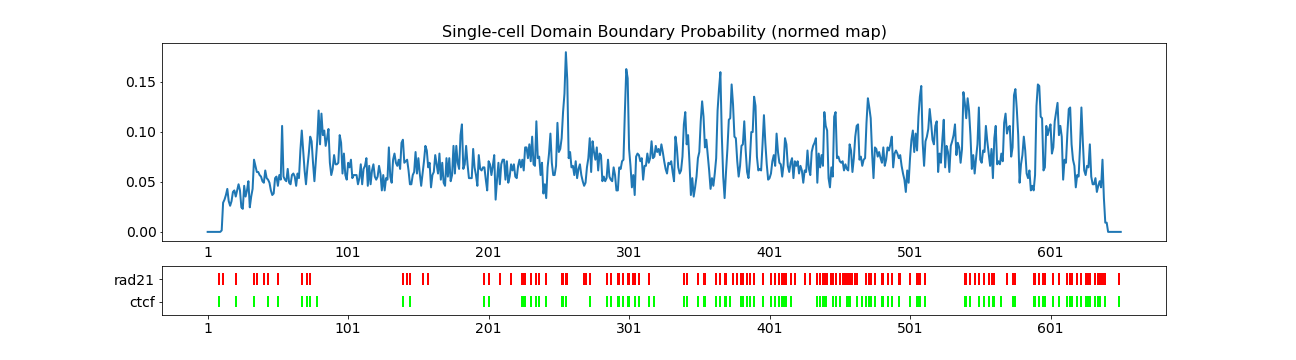

[Text(0,0,'1'),
 Text(0,0,'101'),
 Text(0,0,'201'),
 Text(0,0,'301'),
 Text(0,0,'401'),
 Text(0,0,'501'),
 Text(0,0,'601')]

In [42]:
%matplotlib notebook
ctcf_th = 200
rad21_th = 100

fig = plt.figure(figsize=(18, 5))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, :],xticklabels=[])
main_ax.plot(_nux+1, _nuy, linewidth=2)
main_ax.set_title('Single-cell Domain Boundary Probability (normed map)', fontsize=16)
main_ax.tick_params(bottom=False, labelsize=14, length=2)
#main_ax.xaxis.set_ticklabels([])
#y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
label_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
signals = [np.where(ctcf_signal>ctcf_th)[0]+1, np.where(rad21_signal>rad21_th)[0]+1]
label_ax.eventplot(signals, lineoffsets=[0,1],linelengths=0.5, linewidths=2, colors=np.array([[0, 1, 0],[1, 0, 0]]))
label_ax.set_yticks([0,1])
label_ax.set_yticklabels(['ctcf', 'rad21'], fontsize=14)
label_ax.set_xticks(np.arange(1,651, 100))
label_ax.set_xticklabels(np.arange(1,651, 100), fontsize=14)

# match RNA burst info

## create RNA list

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 60
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\RNA_Info.csv
- header: ['RNA_id', 'gene_name', 'chr', 'strand', 'start', 'end', 'midpoint']
-- 93 RNA information loaded!
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!
33 folders are found according to color-usage annotation.
+ Create Cell_Data objects for field of view: [29]
++ preparing variables
++ choose dapi images from folder: Y:\20190302_IMR90_CTP05_intronFISH\H0R0.
+ Load segmentation for fov 29
-- directly load segmentation result from:Y:\20190302_IMR90_CTP05_intronFISH\Analysis\segmentation\Co

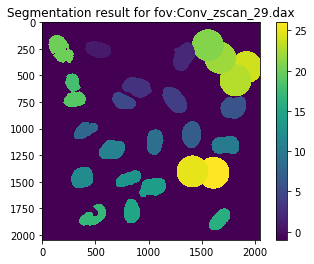

+ Create cell_data objects, num_of_cell:26
+ Creating 26 cells with 24 threads.


In [6]:
# initialize cell-list
param = {'data_folder':r'Y:\20190302_IMR90_CTP05_intronFISH',
         'experiment_type':'RNA',
         'save_folder':r'V:\20190302_intronicRNA_unique',
         'num_threads': 24,
         'correction_folder':r'I:\Corrections',
         };
rna_lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])
# create cells
rna_lst._create_cells_fov(fov_ids, _drift_size=370, _coord_sel=[400,400], _load_segmentation=True,
                          _load_exist_info=True)

In [8]:
lst._merge_RNA_to_DNA(rna_lst, _merge_type='cell_info', _match_dic=None,
                      _load_in_ram=True, _save_to_file=True, _overwrite=True)

+ Start merging RNA cell_info into cell list with cells:26
++ 26 cells are going to merge with RNA info!
++ 0 cells are skipped for merging.
++ start multiprocessing merging RNA to DNA.
++ update cell_datas into cell_list
++ total time for merging RNA to DNA: 24.774452686309814
